# Проект Обучение с учителем: качество модели

## Описание проекта

<div class="alert alert-secondary" style="background-color:#DCDCDC;color:black;">

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 
Итак, вашему отделу поручили **разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность**.
### Как решать задачу

Продумывать подход к решению этой задачи вам не придётся — руководитель отдела его уже сформировал:
1.	**Нужно промаркировать уровень финансовой активности постоянных покупателей**. В компании принято выделять два уровня активности: **«снизилась»**, если клиент стал покупать меньше товаров, и **«прежний уровень»**.
2.	Нужно собрать данные по клиентам по следующим группам: 
    -	Признаки, которые описывают **коммуникацию** сотрудников компании с клиентом.
    -	Признаки, которые описывают **продуктовое поведение** покупателя. Например, какие товары покупает и как часто.
    -	Признаки, которые описывают **покупательское поведение** клиента. Например, сколько тратил в магазине.
    -	Признаки, которые описывают **поведение покупателя на сайте**. Например, как много страниц просматривает и сколько времени проводит на сайте.


Представим группы признаков (вместе с целевым) в виде диаграммы — такую визуализацию ещё называют диаграммой Исикавы.
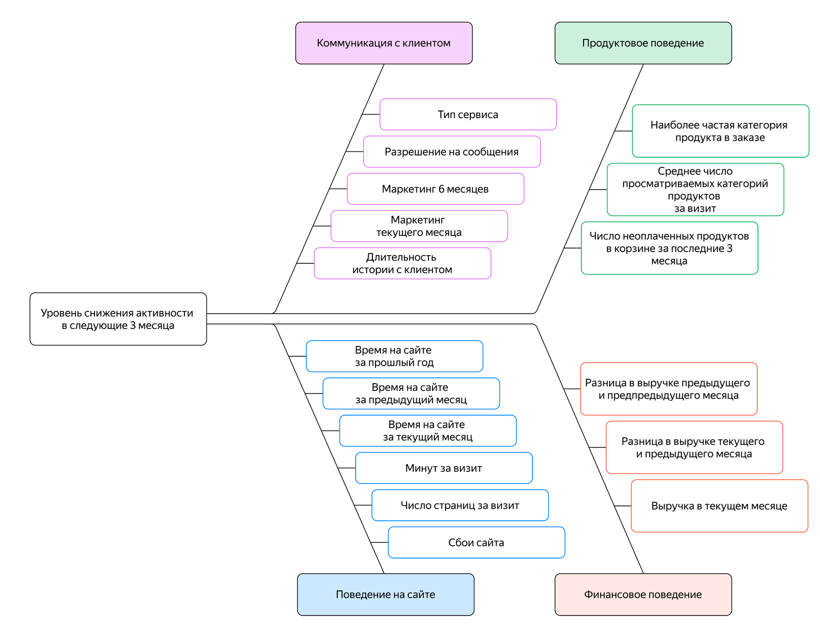

1.	Нужно **построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца**.
2.	В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
3.	Используя данные модели и данные о прибыльности клиентов, нужно **выделить сегменты покупателей и разработать для них персонализированные предложения**.
Руководство одобрило описание решения, и вам, как специалисту по DS, нужно его реализовать.

<div class="alert alert-secondary" style="background-color:#D9EEE1;color:black;">

### Описание данных

Данные для работы находятся в нескольких таблицах. 

**market_file.csv**
Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
-	id — номер покупателя в корпоративной базе данных.
-	Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
-	Тип сервиса — уровень сервиса, например «премиум» и «стандарт».
-	Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
-	Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
-	Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
-	Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
-	Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
-	Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
-	Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
-	Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
-	Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта.
-	Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

**market_money.csv**
Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
-	id — номер покупателя в корпоративной базе данных.
-	Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
-	Выручка — сумма выручки за период.

**market_time.csv**
Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
-	id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксировано общее время.
-	минут — значение времени, проведённого на сайте, в минутах.

**money.csv**
Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
-	id — номер покупателя в корпоративной базе данных.
-	Прибыль — значение прибыли.

<div class="alert alert-secondary" style="background-color:#DCDCDC;color:black;">

### Инструкция по выполнению проекта

Решать задачу вам нужно в два этапа:
1.	Разработайте модель, которая предскажет вероятность снижения покупательской активности.
2.	Выделите сегмент покупателей, проанализируйте его и предложите, как увеличить его покупательскую активность. Используйте данные моделирования, данные о прибыли покупателей и исходные данные (если понадобятся). По желанию вы можете проанализировать больше одного сегмента. Ниже несколько примеров сегментов, но вы также можете выделить свой: 
-	Группа клиентов с максимальной долей **покупок по акции** и высокой вероятностью снижения покупательской активности.
-	Группа клиентов, которые покупают **только технику**, то есть товары с длинным жизненным циклом.
-	Группа клиентов, которые покупают товары из категории «**Товары для себя**» (новая категория, которую можно выделить на основе текущих) или «Товары для детей».
-	Группа клиентов **с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью**.

## Шаг 1. Загрузка данных

<div class="alert alert-secondary" style="background-color:#DCDCDC;color:black;">

1.1 Загрузите данные. Файлы market_file.csv, market_money.csv, market_time.csv, money.csv доступны по ссылкам в описании данных или через пути к ним:

Обратите внимание: в некоторых файлах разделитель значений — точка с запятой, а разделитель десятичных значений — запятая. 


In [2]:
!pip install --upgrade scikit-learn -q
!pip install phik -q
!pip install shap -q
!pip install matplotlib==3.5.0 -q 

In [3]:

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 
import seaborn as sns
import phik

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (OneHotEncoder, OrdinalEncoder, 
                                   MinMaxScaler, StandardScaler)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import (roc_auc_score, f1_score,
                             recall_score, precision_score)

from sklearn.preprocessing import LabelEncoder

import shap
from shap.plots import beeswarm


вспомогательные функции:

In [4]:
def correct_path (csv_name):
    if not os.path.exists(csv_name):
        return '/datasets/' + csv_name
    return csv_name

def draw_numerical_stats(data, xlabel, ylabel, bins=50):
    display (f"********** Следующий признак: {xlabel}")
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(9, 4))
    axs[0].boxplot(data, vert=False);
    axs[1].hist(data, bins=bins);
    axs[1].set_xlabel(xlabel)
    axs[1].set_ylabel(ylabel)
    display(data.describe())
    plt.show();

def draw_categorial_stats (data, title):
    ax = data.value_counts().plot(title=title, kind='pie', autopct=lambda x: f"{x:.0f}%");
    ax.set_ylabel('')
    plt.show();


In [5]:
dfs = {'market_file' : _, 
       'market_money': _,
       'market_time': _,
       'money': _}

dfs['market_file'] = pd.read_csv('https://code.s3.yandex.net/datasets/market_file.csv')
dfs['market_money'] = pd.read_csv('https://code.s3.yandex.net/datasets/market_money.csv')
dfs['market_time'] = pd.read_csv('https://code.s3.yandex.net/datasets/market_time.csv')
dfs['money'] = pd.read_csv('https://code.s3.yandex.net/datasets/money.csv')

for df_name in dfs:
    display(f"*********** dataframe {df_name} ***********")
    display(dfs[df_name].info())
    display(dfs[df_name].head())

'*********** dataframe market_file ***********'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

None

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


'*********** dataframe market_money ***********'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


'*********** dataframe market_time ***********'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


'*********** dataframe money ***********'

<class 'pandas.core.frame.DataFrame'>
Index: 1300 entries, 215348;0 to 216647;3
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id;Прибыль  1284 non-null   float64
dtypes: float64(1)
memory usage: 20.3+ KB


None

,id;Прибыль
215348;0,98.0
215349;4,16.0
215350;3,13.0
215351;4,87.0
215352;4,21.0


исправим сепараторы:

In [6]:
dfs['money'] = pd.read_csv('https://code.s3.yandex.net/datasets/money.csv', sep=';', decimal = ',')
display(dfs['money'].info())
display(dfs['money'].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


<div class="alert alert-secondary" style="background-color:#DCDCDC;color:black;">
 
1.2 Проверьте, что данные в таблицах соответствуют описанию. Исследованием и объединением данных вы займётесь позже.

В таблице money.csv поправил разделители столбцов и вещественных чисел. В остальном всё верно.

## Шаг 2. Предобработка данных


<div class="alert alert-secondary" style="background-color:#DCDCDC;color:black;">
Проведите необходимую предобработку данных. Названия столбцов можно оставить кириллическими.

Типы во всех таблицах верные.

Изучим пропуски

In [7]:
for df_name in dfs:
    display(f"*********** dataframe {df_name} ***********")
    display(dfs[df_name].isna().sum())

'*********** dataframe market_file ***********'

id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64

'*********** dataframe market_money ***********'

id         0
Период     0
Выручка    0
dtype: int64

'*********** dataframe market_time ***********'

id        0
Период    0
минут     0
dtype: int64

'*********** dataframe money ***********'

id         0
Прибыль    0
dtype: int64

Пропусков не найдено.

Изучим явные дубликаты в датафрейме

In [8]:
for df_name in dfs:
    display(f"*********** dataframe {df_name} ***********")
    display(dfs[df_name].duplicated().sum())

'*********** dataframe market_file ***********'

0

'*********** dataframe market_money ***********'

0

'*********** dataframe market_time ***********'

0

'*********** dataframe money ***********'

0

Явных дубликатов не найдено.

Изучим неявные дубликаты в датафрейме

In [9]:
for df_name in dfs:
    display(f"*********** dataframe {df_name} ***********")
    for column in dfs[df_name]:
        if dfs[df_name][column].dtype == 'O':
            display(f"столбец {column}")
            display(dfs[df_name][column].value_counts())

'*********** dataframe market_file ***********'

'столбец Покупательская активность'

Прежний уровень    802
Снизилась          498
Name: Покупательская активность, dtype: int64

'столбец Тип сервиса'

стандарт     914
премиум      376
стандартт     10
Name: Тип сервиса, dtype: int64

'столбец Разрешить сообщать'

да     962
нет    338
Name: Разрешить сообщать, dtype: int64

'столбец Популярная_категория'

Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: Популярная_категория, dtype: int64

'*********** dataframe market_money ***********'

'столбец Период'

предыдущий_месяц       1300
препредыдущий_месяц    1300
текущий_месяц          1300
Name: Период, dtype: int64

'*********** dataframe market_time ***********'

'столбец Период'

предыдцщий_месяц    1300
текущий_месяц       1300
Name: Период, dtype: int64

'*********** dataframe money ***********'

Исправим неявные дубликаты и опечатки:

In [10]:
dfs['market_file']['Тип сервиса'] = dfs['market_file']['Тип сервиса'] \
    .replace('стандартт', 'стандарт')
display(dfs['market_file']['Тип сервиса'].value_counts())

стандарт    924
премиум     376
Name: Тип сервиса, dtype: int64

In [11]:
dfs['market_time']['Период'] = dfs['market_time']['Период'] \
    .replace('предыдцщий_месяц', 'предыдущий_месяц')
display(dfs['market_time']['Период'].value_counts())

предыдущий_месяц    1300
текущий_месяц       1300
Name: Период, dtype: int64

Наша задача - предсказание тех клиентов, у которых снизилась активность, и, значит, которым стоит предлагать спец-предложения. С покупателями, у которых активность прежня - делать ничего не требуется. Поэтому пусть класс Positive будет "снизится активность", класс Negative - "прежняя активность".

In [12]:
dfs['market_file'].head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


## Шаг 3. Исследовательский анализ данных

<div class="alert alert-secondary" style="background-color:#DCDCDC;color:black;">
Проведите исследовательский анализ данных из каждой таблицы.

Изучим категориальные значения

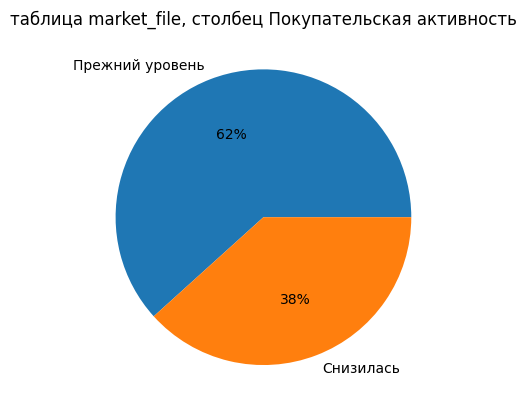

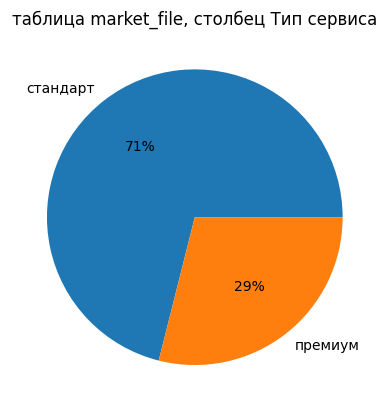

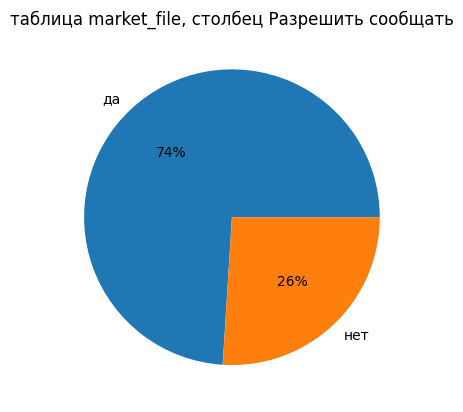

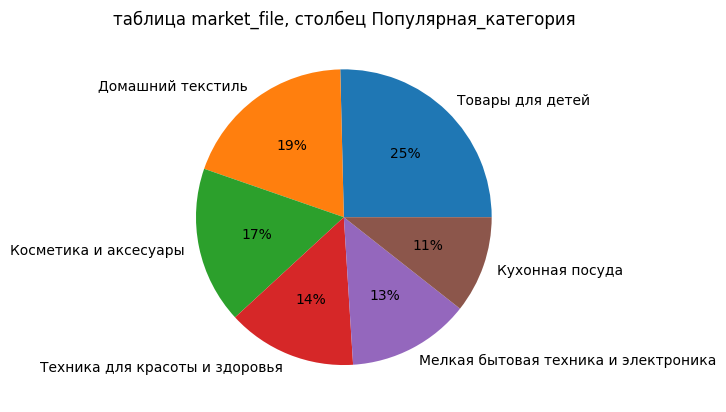

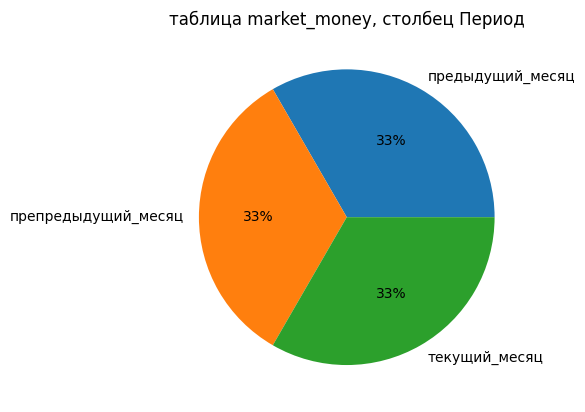

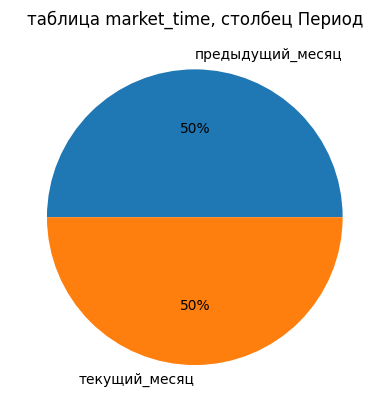

In [13]:
for df_name in dfs:
    for column in dfs[df_name]:
        if dfs[df_name][column].dtype == 'O':
            draw_categorial_stats(dfs[df_name][column],
                                  f"таблица {df_name}, столбец {column}")
            plt.show()

Проверим количественные значения

'********** Следующий признак: таблица market_file, столбец Маркет_актив_6_мес'

count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: Маркет_актив_6_мес, dtype: float64

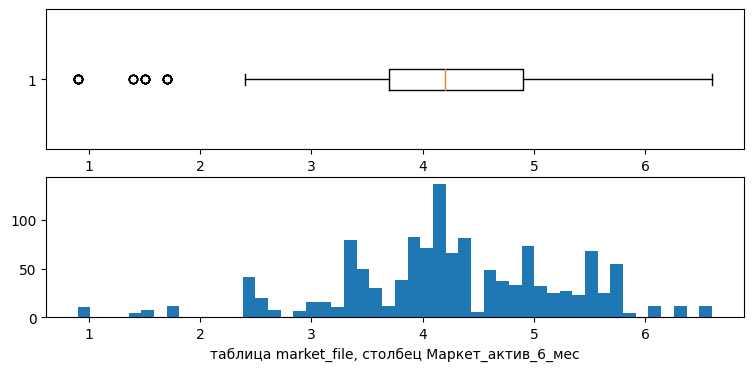

'********** Следующий признак: таблица market_file, столбец Маркет_актив_тек_мес'

count    1300.000000
mean        4.011538
std         0.696868
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Маркет_актив_тек_мес, dtype: float64

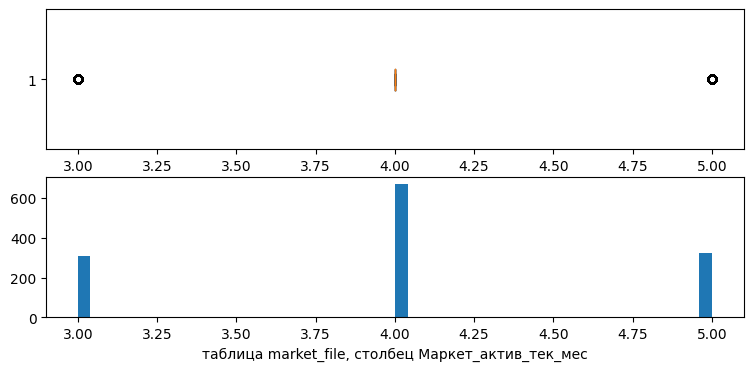

'********** Следующий признак: таблица market_file, столбец Длительность'

count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: Длительность, dtype: float64

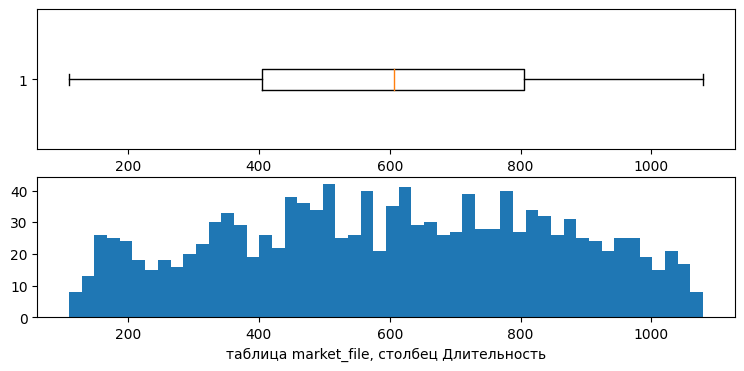

'********** Следующий признак: таблица market_file, столбец Акционные_покупки'

count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: Акционные_покупки, dtype: float64

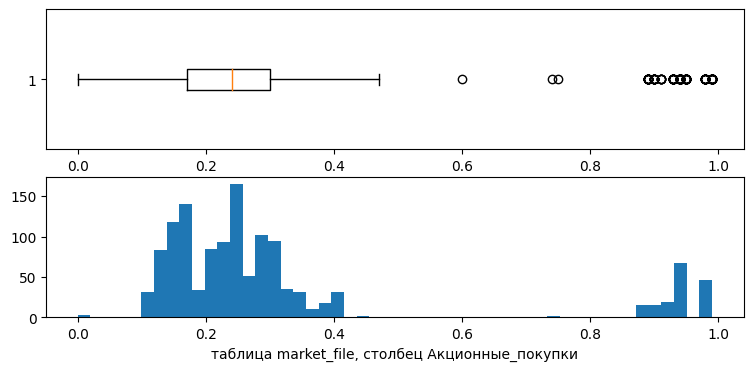

'********** Следующий признак: таблица market_file, столбец Средний_просмотр_категорий_за_визит'

count    1300.00000
mean        3.27000
std         1.35535
min         1.00000
25%         2.00000
50%         3.00000
75%         4.00000
max         6.00000
Name: Средний_просмотр_категорий_за_визит, dtype: float64

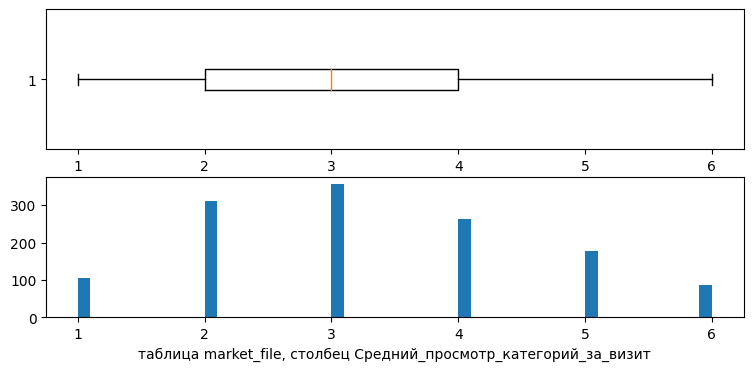

'********** Следующий признак: таблица market_file, столбец Неоплаченные_продукты_штук_квартал'

count    1300.000000
mean        2.840000
std         1.971451
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: Неоплаченные_продукты_штук_квартал, dtype: float64

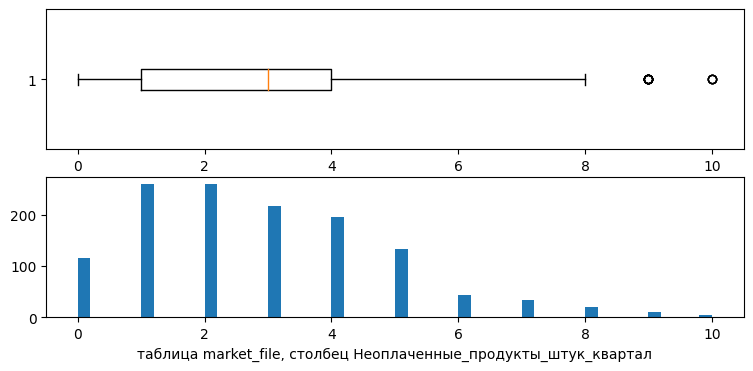

'********** Следующий признак: таблица market_file, столбец Ошибка_сервиса'

count    1300.000000
mean        4.185385
std         1.955298
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: Ошибка_сервиса, dtype: float64

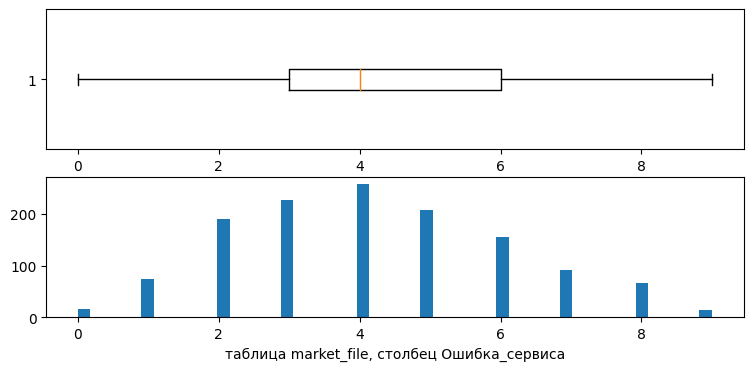

'********** Следующий признак: таблица market_file, столбец Страниц_за_визит'

count    1300.000000
mean        8.176923
std         3.978126
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: Страниц_за_визит, dtype: float64

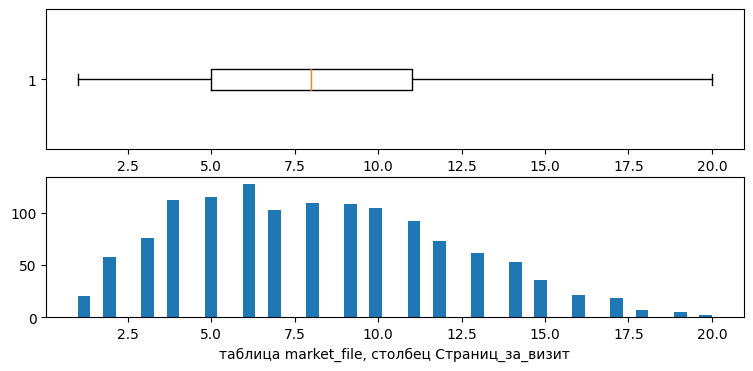

'********** Следующий признак: таблица market_money, столбец Выручка'

count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: Выручка, dtype: float64

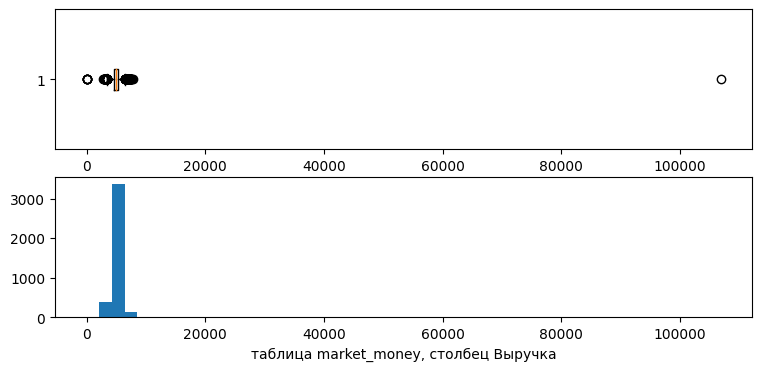

'********** Следующий признак: таблица market_time, столбец минут'

count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: минут, dtype: float64

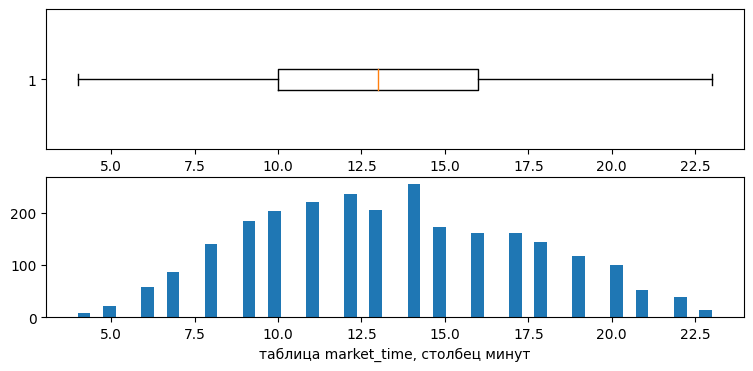

'********** Следующий признак: таблица money, столбец Прибыль'

count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: Прибыль, dtype: float64

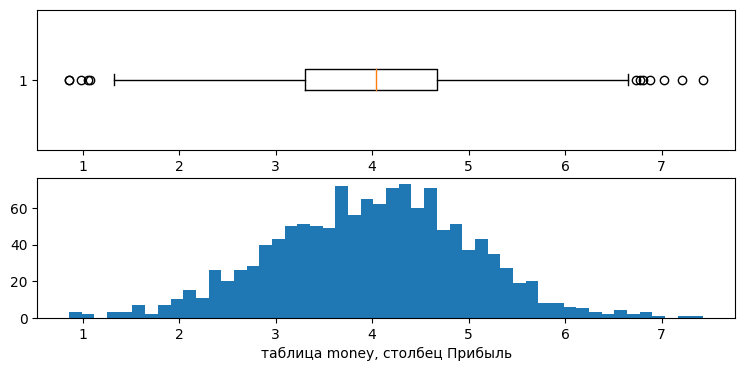

In [14]:
for df_name in dfs:
    for column in dfs[df_name]:
        if dfs[df_name][column].dtype in ['int64', 'float64'] and column != "id":
            draw_numerical_stats(dfs[df_name][column],
                                 f"таблица {df_name}, столбец {column}", "" )

Некоторые графики обратили на себя внимание - изучим их:

таблица **market_file**

- *Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента*

In [15]:
tmp = dfs['market_file'].query('Маркет_актив_6_мес < 2')
display(len(tmp))
display(tmp)

36

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
30,215378,Снизилась,стандарт,да,1.7,3,488,0.39,Техника для красоты и здоровья,5,1,4,3
32,215380,Снизилась,премиум,нет,1.7,4,637,0.94,Техника для красоты и здоровья,3,2,4,7
38,215386,Снизилась,стандарт,да,1.5,3,495,0.98,Домашний текстиль,2,3,7,5
47,215395,Снизилась,премиум,да,1.5,5,645,0.27,Товары для детей,3,3,6,5
55,215403,Снизилась,премиум,да,1.7,5,771,0.39,Техника для красоты и здоровья,1,8,2,5
61,215409,Снизилась,премиум,да,1.4,4,857,0.95,Кухонная посуда,3,4,5,5
63,215411,Снизилась,стандарт,да,1.7,4,756,0.33,Товары для детей,2,3,7,4
70,215418,Снизилась,стандарт,нет,1.7,4,472,0.94,Домашний текстиль,2,6,4,3
81,215429,Снизилась,премиум,нет,0.9,4,690,0.24,Домашний текстиль,2,5,7,4
108,215456,Снизилась,стандарт,да,1.7,4,449,0.23,Косметика и аксесуары,3,4,4,5


На ящике с усами есть 36 выбросов <2 коммуникаций - это около 3% от всех данных (1300). Стоит ли их выбросить - сходу не очевидно. Вдруг это как раз будет важный для модели порог. По своей сути - в редких коммуникациях ничего аномального нет. Пока решено оставить.

Распределение похоже на нормальное.

- *Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце*

Ящик с усам выглядит необычно. Посмотрим еще вот так:

In [16]:
dfs['market_file']['Маркет_актив_тек_мес'].value_counts()

4    669
5    323
3    308
Name: Маркет_актив_тек_мес, dtype: int64

Всего 3 значения (3, 4, 5 коммуникаций в месяц) - видимо такова политика. Ничего менять не будем.

- *Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.*

Справа много выбросов. Распределение похоже на смесь двух нормальных. Обычно акционные покупки занимают 10-40% (первое нормальное распределение). Но в какие-то периоды (чёрных пятница итп) оно может смещаться в к 90%. Менять не будем ничего.

-	*Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.*

Есть пара выбросов справа. Но распределение похоже на Пуассона. Судя по графику распределения снижение - ожидаемо, спишем выбросы на это.

 **таблица market_money**

-	*Выручка — сумма выручки за период.*

Есть очень странный выброс справа - более 100000 р. В принципе покупка дороже 100 тыс рублей в маркете возможна - это может быть электроника (которая была в списке категорий товара). Посмотрим:

In [17]:
dfs['market_money'].query('Выручка > 100000')

,id,Период,Выручка
98,215380,текущий_месяц,106862.2


что это за покупатель?

In [18]:
display (dfs['market_money'].query('id==215380'))

,id,Период,Выручка
96,215380,препредыдущий_месяц,5051.0
97,215380,предыдущий_месяц,6077.0
98,215380,текущий_месяц,106862.2


In [19]:
display (dfs['market_file'].query('id==215380'))

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
32,215380,Снизилась,премиум,нет,1.7,4,637,0.94,Техника для красоты и здоровья,3,2,4,7


Всего 3 покупки по акции в 94% случаев, техника для красоты и здоровья. Выглядит как вполне возможное поведение. Но ради одной покупки единичного пользователя не будем усложнять картину. Удалим информацию о покупке дороже 100000 этого пользователя.

In [20]:
dfs['market_money'] = dfs['market_money'].drop( dfs['market_money'].query('Выручка==106862.2').index )
dfs['market_money'] = dfs['market_money'].reset_index(drop=True)

посмотрим на данные:

'********** Следующий признак: Выручка'

count    3899.00000
mean     4999.57743
std       706.99988
min         0.00000
25%      4590.10000
50%      4957.00000
75%      5363.00000
max      7799.40000
Name: Выручка, dtype: float64

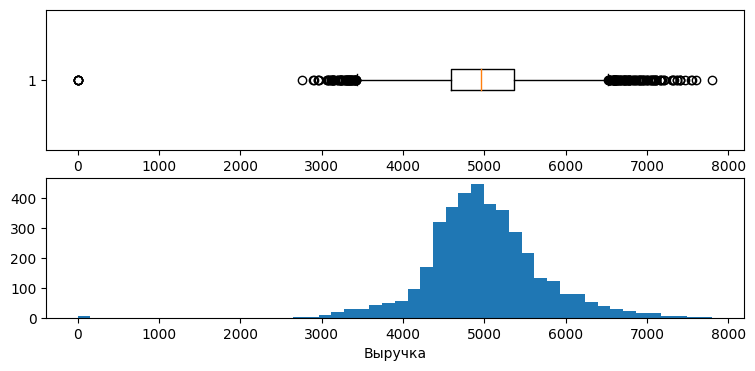

In [21]:
draw_numerical_stats (dfs['market_money']['Выручка'], "Выручка", "")

Теперь появились сильно выделяющиеся выбросы около 0. Удалим и их.

In [22]:
dfs['market_money'] = dfs['market_money'].drop( dfs['market_money'].query('Выручка<1000').index )
dfs['market_money'] = dfs['market_money'].reset_index(drop=True)

посмотрим на данные:

'********** Следующий признак: Выручка'

count    3893.000000
mean     5007.282918
std       679.724898
min      2758.700000
25%      4592.000000
50%      4959.000000
75%      5363.000000
max      7799.400000
Name: Выручка, dtype: float64

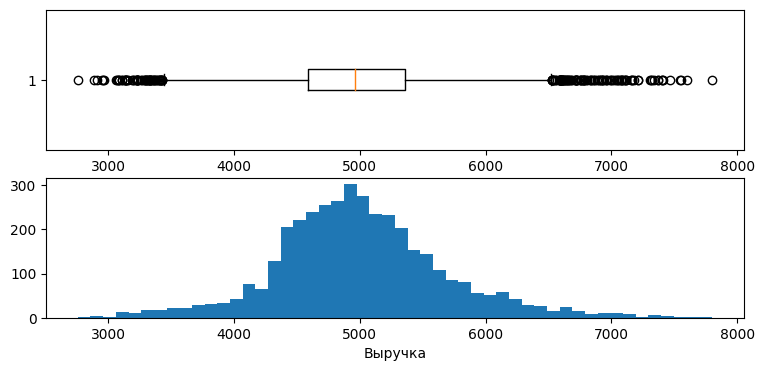

In [23]:
draw_numerical_stats (dfs['market_money']['Выручка'], "Выручка", "")

Оставим выручку так.

 **таблица money**

-	*Прибыль — значение прибыли*

Есть выбросы слева и справа, распределение нормальное. Не будем трогать, т. к. распределение выглядит довольно плавным, к тому же вполне могут могут быть клиенты, которые покупают редко эконом товары (или не покупают ничего за некоторый период), а бывают и шопоголики.

<div class="alert alert-secondary" style="background-color:#DCDCDC;color:black;">
Отберите клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период.

Это покупатели, по которым была зафиксирована выручка в market_money за последние 3 месяца: в этом, предыдущий и препредыдущем. Но тогда получается, что это просто все id, которые есть в таблице market_money, т. к. столбец "Период" содержит только эти 3 периода.

Возможно, я как-то не так понял задание - поправьте меня тогда, пожалуйста.

In [24]:
recent_3m_users = pd.unique(dfs['market_money']['id'])

Посчитаем суммарную выручку и суммарную прибыль.

In [25]:
display(sum(dfs['market_money']['Выручка']))

19493352.400000006

In [26]:
display(sum(dfs['money']['Прибыль']))

5195.6199999999835

<div class="alert alert-secondary" style="background-color:#DCDCDC;color:black;">
Оформите выводы по результатам шага.

Выводы по категориальным признакам:
- аномалий в категориальных значениях не найдено
- у большинства пользователей (62%) покупательская активность на прежнем, а не на сниженном уровне
- большинство пользователей (71%) использует стандартный сервис, а не премиум
- большинство пользователей (74%) разрешило сообщать о себе информацию
- выручка и прибыль распределена по месяцам равномерно (с точностью до всех пользователей)
- наиболее популярная категория товаров - "товары для детей" (25%)
- наименее популярная - "кухонная посуда" (11%)

Выводы по числовым признакам:
- среднемесячное значение маркетинговых коммуникаций компании(за последние 6 месяцев) ~1
- средний возраст регистрации на сайте ~601 дней
- среднемесячная доля покупок по акции от общего числа покупок ~25%
- в среднем покупатель просмотрел за визит в течение последнего месяца ~1.4 категорий
- общее число неоплаченных товаров в корзине за последние 3 месяца ~2
- число сбоев, которые коснулись покупателя во время посещения сайта ~ 2
- среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца ~4
- средняя выручка, которую получает магазин с покупателя ~5007
- среднее время, проведённое на сайте ~4 минуты
- средняя прибыль получает магазин от продаж каждому покупателю ~4
    - маловато по сравнению со средней выручкой 5025 - всего-то 0.07%
    - суммарная выручка 19493352
    - суммарная прибыль 5195
    - отношение сумм ещё хуже: 0.03% - обычно продавцы закладывают значительно бОльшую маржу, данный магазин так долго не протянет

## Шаг 4. Объединение таблиц

<div class="alert alert-secondary" style="background-color:#DCDCDC;color:black;">
4.1 Объедините таблицы market_file.csv, market_money.csv, market_time.csv. Данные о прибыли из файла money.csv при моделировании вам не понадобятся. 

4.2 Учитывайте, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице сделайте отдельный столбец для каждого периода.

Проверим, одинаково ли количество строк в этих таблицах.

In [27]:
dfs['market_file'].shape

(1300, 13)

In [28]:
dfs['market_money'].shape

(3893, 3)

In [29]:
dfs['market_time'].shape

(2600, 3)

данных в market_money примерно в 3 раза больше, чем в market_file, т. к. там 3 месяца- текущий, предыдущий и препредыдущий

примерно - т. к. удалено часть выбросов, удалим данные с NaN после объединения

соответвевнно в market_time их 2 2 раза больше, т. к. там 2 месяца

In [30]:
market_money = dfs['market_money'].pivot_table(index='id', columns="Период")
market_money.columns = market_money.columns.map(lambda index: f'{index[0]}_{index[1]}')

market_time = dfs['market_time'].pivot_table(index='id', columns="Период")
market_time.columns = market_time.columns.map(lambda index: f'{index[0]}_{index[1]}')

df = dfs['market_file']

df = df.merge(market_money, on='id', how='left')
df = df.merge(market_time, on='id', how='left')

df = df.dropna()
df = df.reset_index(drop=True)

display(df)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7,14,7
1292,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0,12,11
1293,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2,12,18
1294,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4923.0,4725.0,5224.6,18,7


In [31]:
"""
df = dfs['market_file']

def merge_column (df, dfs, table_name, month, column):
    df = df.merge(dfs[table_name].query(f'Период == "{month}"')[['id', column]],
                on='id', how='left')
    df = df.rename (columns={column: f'{column}_{month}'})
    return df

df = merge_column (df, dfs, 'market_money', 'текущий_месяц', 'Выручка')

df = merge_column (df, dfs, 'market_money', 'предыдущий_месяц', 'Выручка')

df = merge_column (df, dfs, 'market_money', 'препредыдущий_месяц', 'Выручка')

df = merge_column (df, dfs, 'market_time', 'текущий_месяц', 'минут')

df = merge_column (df, dfs, 'market_time', 'предыдущий_месяц', 'минут')

df = df.dropna()

display(df)
"""

'\ndf = dfs[\'market_file\']\n\ndef merge_column (df, dfs, table_name, month, column):\n    df = df.merge(dfs[table_name].query(f\'Период == "{month}"\')[[\'id\', column]],\n                on=\'id\', how=\'left\')\n    df = df.rename (columns={column: f\'{column}_{month}\'})\n    return df\n\ndf = merge_column (df, dfs, \'market_money\', \'текущий_месяц\', \'Выручка\')\n\ndf = merge_column (df, dfs, \'market_money\', \'предыдущий_месяц\', \'Выручка\')\n\ndf = merge_column (df, dfs, \'market_money\', \'препредыдущий_месяц\', \'Выручка\')\n\ndf = merge_column (df, dfs, \'market_time\', \'текущий_месяц\', \'минут\')\n\ndf = merge_column (df, dfs, \'market_time\', \'предыдущий_месяц\', \'минут\')\n\ndf = df.dropna()\n\ndisplay(df)\n'

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1296 non-null   int64  
 1   Покупательская активность            1296 non-null   object 
 2   Тип сервиса                          1296 non-null   object 
 3   Разрешить сообщать                   1296 non-null   object 
 4   Маркет_актив_6_мес                   1296 non-null   float64
 5   Маркет_актив_тек_мес                 1296 non-null   int64  
 6   Длительность                         1296 non-null   int64  
 7   Акционные_покупки                    1296 non-null   float64
 8   Популярная_категория                 1296 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1296 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 11  Ошибка_сервиса                

## Шаг 5. Корреляционный анализ

<div class="alert alert-secondary" style="background-color:#DCDCDC;color:black;">
Проведите корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования. Сделайте выводы о мультиколлинеарности и при необходимости устраните её.

interval columns not set, guessing: ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'Выручка_предыдущий_месяц', 'Выручка_препредыдущий_месяц', 'Выручка_текущий_месяц', 'минут_предыдущий_месяц', 'минут_текущий_месяц']


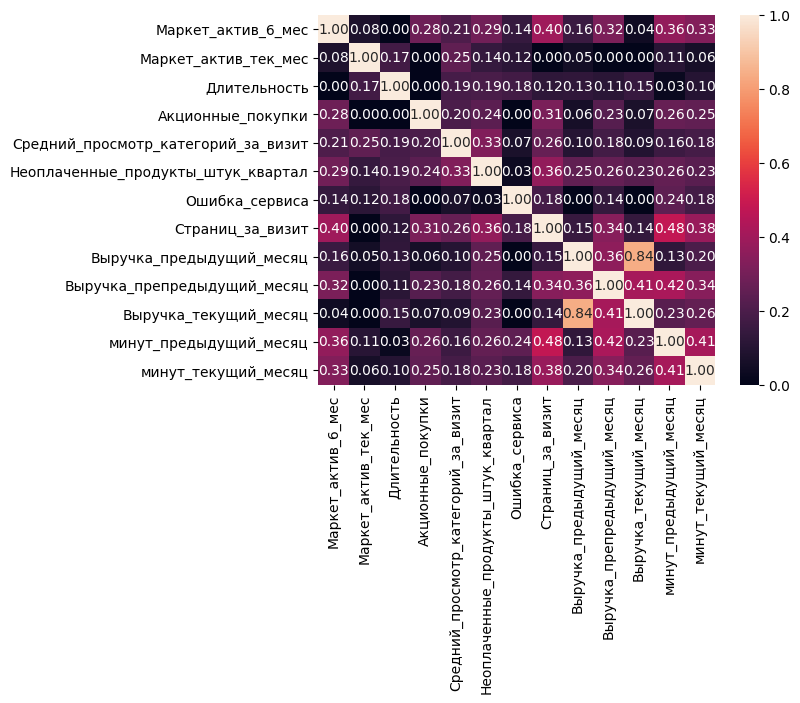

In [33]:
df_num = df.select_dtypes(include='number')
df_num = df_num.drop('id', axis=1)
sns.heatmap(df_num.phik_matrix(), annot=True, fmt='.2f');

Как говорилось, в лекциях:
        - *Как правило, о мультиколлинеарности говорят при значении коэффициента корреляции от 0.9 до 0.95 по модулю. В такой ситуации лишние коррелирующие признаки нужно удалять из обучающей выборки.*

Максимально близки столбцы "Выручка текущий месяц" и "Выручка предыдущий месяц" (0.84), но корреляция менее 0.9, да и по сути это деньги - важные данные, а затраты по месяцам  напрямую могут вполне быть не связаны в реальной жизни. Поэтому оставляем как есть.

In [34]:
"""
axes = pd.plotting.scatter_matrix(df_num, figsize=(10, 10))
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()
"""

"\naxes = pd.plotting.scatter_matrix(df_num, figsize=(10, 10))\nfor ax in axes.flatten():\n    ax.xaxis.label.set_rotation(90)\n    ax.yaxis.label.set_rotation(0)\n    ax.yaxis.label.set_ha('right')\n\nplt.tight_layout()\nplt.gcf().subplots_adjust(wspace=0, hspace=0)\nplt.show()\n"

## Шаг 6. Использование пайплайнов

<div class="alert alert-secondary" style="background-color:#DCDCDC;color:black;">
Примените все изученные модели. Для этого используйте пайплайны.

6.1 Во время подготовки данных используйте ColumnTransformer. Количественные и категориальные признаки обработайте в пайплайне раздельно. Для кодирования категориальных признаков используйте как минимум два кодировщика, для масштабирования количественных — как минимум два скейлера.
Напоминаем, что для каждой модели можно подготовить данные с разным кодированием и масштабированием.


Наша задача - предсказание тех клиентов, у которых снизилась активность, и, значит, которым стоит предлагать спец-предложения. С покупателями, у которых активность прежня - делать ничего не требуется. Поэтому пусть класс Positive будет "снизится активность", класс Negative - "прежняя активность". Ниже в коде заменим соответствующие тексты в Y на 1 и 0.

In [35]:
df['Покупательская активность'].value_counts()

Прежний уровень    802
Снизилась          494
Name: Покупательская активность, dtype: int64

In [36]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

df['Покупательская активность'] = \
    df['Покупательская активность'] \
        .apply(lambda x: 1 if x == "Снизилась" else 0)

X_train, X_test, y_train, y_test = train_test_split (
    df.drop(['Покупательская активность', 'id'], axis=1),
    df['Покупательская активность'],
    test_size = TEST_SIZE,
    random_state = RANDOM_STATE,
    stratify = df['Покупательская активность']
    )

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

ohe_columns = ['Разрешить сообщать', 'Популярная_категория']
ord_columns = ['Тип сервиса', ]
num_columns = ['Длительность',
               'Акционные_покупки',
               'Выручка_текущий_месяц', 'Выручка_предыдущий_месяц', 
               'Выручка_препредыдущий_месяц', 
               'минут_текущий_месяц', 'минут_предыдущий_месяц', 'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Страниц_за_визит',
                   'Ошибка_сервиса',  'Средний_просмотр_категорий_за_визит',
               'Неоплаченные_продукты_штук_квартал']

ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
    )

ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[['стандарт', 'премиум']], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns),
    ], 
    remainder='passthrough'
) 



In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 972 entries, 506 to 678
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Тип сервиса                          972 non-null    object 
 1   Разрешить сообщать                   972 non-null    object 
 2   Маркет_актив_6_мес                   972 non-null    float64
 3   Маркет_актив_тек_мес                 972 non-null    int64  
 4   Длительность                         972 non-null    int64  
 5   Акционные_покупки                    972 non-null    float64
 6   Популярная_категория                 972 non-null    object 
 7   Средний_просмотр_категорий_за_визит  972 non-null    int64  
 8   Неоплаченные_продукты_штук_квартал   972 non-null    int64  
 9   Ошибка_сервиса                       972 non-null    int64  
 10  Страниц_за_визит                     972 non-null    int64  
 11  Выручка_предыдущий_месяц      

<div class="alert alert-secondary" style="background-color:#DCDCDC;color:black;">
6.2 Обучите четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC(). Для каждой из них подберите как минимум один гиперпараметр. Выберите подходящую для задачи метрику, аргументируйте свой выбор. Используйте эту метрику при подборе гиперпараметров.

В случае False Positive - мы зря дадим спец-предложение активному пользователю и потеряем стоимость скидки.

В случае False Negative - мы упустим клиента, у которого снизится активность, и есть риск его дальнейшей потери.

False Negative (за который отвечает Recall) - выглядит критичнее (хотя и раздавать зря акции тоже нежелательно - за это отвечает Precision).

Значит, ключевая метрика - **Recall**. Precision же - также попутно оценим (и если там всё плохо - будем улучшать).

In [38]:
pipe_final_DT = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
) 

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    }
]

grid_DT = GridSearchCV(
    pipe_final_DT, 
    param_grid,
    cv=5, 
    scoring='recall', 
    n_jobs = -1
)
grid_DT.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('simpleImputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['Разрешить '
                                                                          'сообщать',
                                                                          'Популярная_категория']),
                                                                        ('ord',
                                                                         Pipeline(ste...
                                                                          'Маркет_актив_тек_мес',
                                                                          'Страниц_за_визит',
                                                                          'Ошибка_сервиса',
                                                                          'Средний_просмотр_категорий_за_визит',
                                                                          'Неоплаченные_продукты_штук_квартал'])])),
                                       ('models',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'models__max_depth': range(2, 5),
                          'models__max_features': range(2, 5),
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']}],
             scoring='recall')

In [39]:
pipe_final_KN = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', KNeighborsClassifier())
    ]
) 

param_grid = [
    # словарь для модели KNeighborsClassifier() 
    {
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    }
]

grid_KN = GridSearchCV(
    pipe_final_KN, 
    param_grid,
    cv=5, 
    scoring='recall', 
    n_jobs = -1
)
grid_KN.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('simpleImputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['Разрешить '
                                                                          'сообщать',
                                                                          'Популярная_категория']),
                                                                        ('ord',
                                                                         Pipeline(ste...
                                                                          'минут_предыдущий_месяц',
                                                                          'Маркет_актив_6_мес',
                                                                          'Маркет_актив_тек_мес',
                                                                          'Страниц_за_визит',
                                                                          'Ошибка_сервиса',
                                                                          'Средний_просмотр_категорий_за_визит',
                                                                          'Неоплаченные_продукты_штук_квартал'])])),
                                       ('models', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid=[{'models__n_neighbors': range(2, 5),
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']}],
             scoring='recall')

In [40]:
pipe_final_LR = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', LogisticRegression(random_state=RANDOM_STATE))
    ]
)

param_grid = [
    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    }
]

grid_LR = GridSearchCV(
    pipe_final_LR, 
    param_grid,
    cv=5, 
    scoring='recall', 
    n_jobs = -1
)
grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('simpleImputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['Разрешить '
                                                                          'сообщать',
                                                                          'Популярная_категория']),
                                                                        ('ord',
                                                                         Pipeline(ste...
                                                                          'Ошибка_сервиса',
                                                                          'Средний_просмотр_категорий_за_визит',
                                                                          'Неоплаченные_продукты_штук_квартал'])])),
                                       ('models',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'models': [LogisticRegression(penalty='l1',
                                                        random_state=42,
                                                        solver='liblinear')],
                          'models__C': range(1, 5),
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']}],
             scoring='recall')

In [41]:
pipe_final_SVC = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', SVC(random_state=RANDOM_STATE))
    ]
)

param_grid = [
    {
        'models': [SVC(
            random_state=RANDOM_STATE, kernel='linear',probability=True
        )],
        'models__kernel': ['poly', 'rbf'],
        'models__degree': range(2, 7),
        'models__C': range(1, 4),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    }
]

grid_SVC = GridSearchCV(
    pipe_final_SVC, 
    param_grid,
    cv=5, 
    scoring='recall', 
    n_jobs = -1
)
grid_SVC.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('simpleImputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['Разрешить '
                                                                          'сообщать',
                                                                          'Популярная_категория']),
                                                                        ('ord',
                                                                         Pipeline(ste...
                                                                          'Средний_просмотр_категорий_за_визит',
                                                                          'Неоплаченные_продукты_штук_квартал'])])),
                                       ('models', SVC(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'models': [SVC(kernel='linear', probability=True,
                                         random_state=42)],
                          'models__C': range(1, 4),
                          'models__degree': range(2, 7),
                          'models__kernel': ['poly', 'rbf'],
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']}],
             scoring='recall')

<div class="alert alert-secondary" style="background-color:#DCDCDC;color:black;">
6.3 Выберите лучшую модель, используя заданную метрику. Для этого примените одну из стратегий:

1. использовать пайплайны и инструменты подбора гиперпараметров для каждой модели отдельно, чтобы выбрать лучшую модель самостоятельно;

In [42]:
_ = pd.DataFrame({'model': ["DecisionTreeClassifier",
                              "KNeighborsClassifier",
                              "LogisticRegression",
                              "SVC"],
                    "recall": [grid_DT.best_score_,
                               grid_KN.best_score_,
                               grid_LR.best_score_,
                               grid_SVC.best_score_]}) \
                    .sort_values('recall', ascending=False)

_.set_index("model")
display (_)

,model,recall
3,SVC,0.770883
2,LogisticRegression,0.760072
1,KNeighborsClassifier,0.752072
0,DecisionTreeClassifier,0.641333


Лучший recall (0.77) показала SVC.

<div class="alert alert-secondary" style="background-color:#DCDCDC;color:black;">
6.3 Выберите лучшую модель, используя заданную метрику. Для этого примените одну из стратегий:

2. использовать один общий пайплайн для всех моделей и инструмент подбора гиперпараметров, который вернёт вам лучшую модель.


In [43]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])


param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },
    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },
    {
        'models': [SVC(
            random_state=RANDOM_STATE, 
            kernel='linear', probability=True
        )],
        'models__kernel': ['poly', 'rbf'],
        'models__degree': range(2, 7),
        'models__C': range(1, 4),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    }
]

grid_search = GridSearchCV(
    pipe_final, 
    param_grid,
    cv=5,
    scoring='recall',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
display('Лучшая модель и её параметры:', grid_search.best_estimator_, )
display ('Recall лучшей модели на тренировочной выборке:', grid_search.best_score_)

'Лучшая модель и её параметры:'

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Разрешить сообщать',
                                                   'Популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord...
                                                   'Выручка_текущий_месяц',
                                                   'Выручка_предыдущий_месяц',
                                                   'Выручка_препредыдущий_месяц',
                                                   'минут_текущий_месяц',
                                                   'минут_предыдущий_месяц',
                                                   'Маркет_актив_6_мес',
                                                   'Маркет_актив_тек_мес',
                                                   'Страниц_за_визит',
                                                   'Ошибка_сервиса',
                                                   'Средний_просмотр_категорий_за_визит',
                                                   'Неоплаченные_продукты_штук_квартал'])])),
                ('models',
                 SVC(C=1, degree=6, kernel='poly', probability=True,
                     random_state=42))])

'Recall лучшей модели на тренировочной выборке:'

0.7708828828828829

Результаты у по-модельных пайплайнов и у единого общего - совпали и по модели (SVC), и по Recall (0.77)

In [44]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Разрешить сообщать',
                                                   'Популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord...
                                                   'Выручка_текущий_месяц',
                                                   'Выручка_предыдущий_месяц',
                                                   'Выручка_препредыдущий_месяц',
                                                   'минут_текущий_месяц',
                                                   'минут_предыдущий_месяц',
                                                   'Маркет_актив_6_мес',
                                                   'Маркет_актив_тек_мес',
                                                   'Страниц_за_визит',
                                                   'Ошибка_сервиса',
                                                   'Средний_просмотр_категорий_за_визит',
                                                   'Неоплаченные_продукты_штук_квартал'])])),
                ('models',
                 SVC(C=1, degree=6, kernel='poly', probability=True,
                     random_state=42))])

In [45]:
y_pred = grid_search.best_estimator_.predict(X_test)
display(f"precision = {precision_score(y_test, y_pred)}")
display(f"recall = {recall_score(y_test, y_pred)}")

'precision = 0.7357142857142858'

'recall = 0.8373983739837398'

## Шаг 7. Анализ важности признаков

<div class="alert alert-secondary" style="background-color:#DCDCDC;color:black;">

7.1 Оцените важность признаков для лучшей модели и постройте график важности с помощью метода SHAP. 

  0%|          | 0/50 [00:00<?, ?it/s]

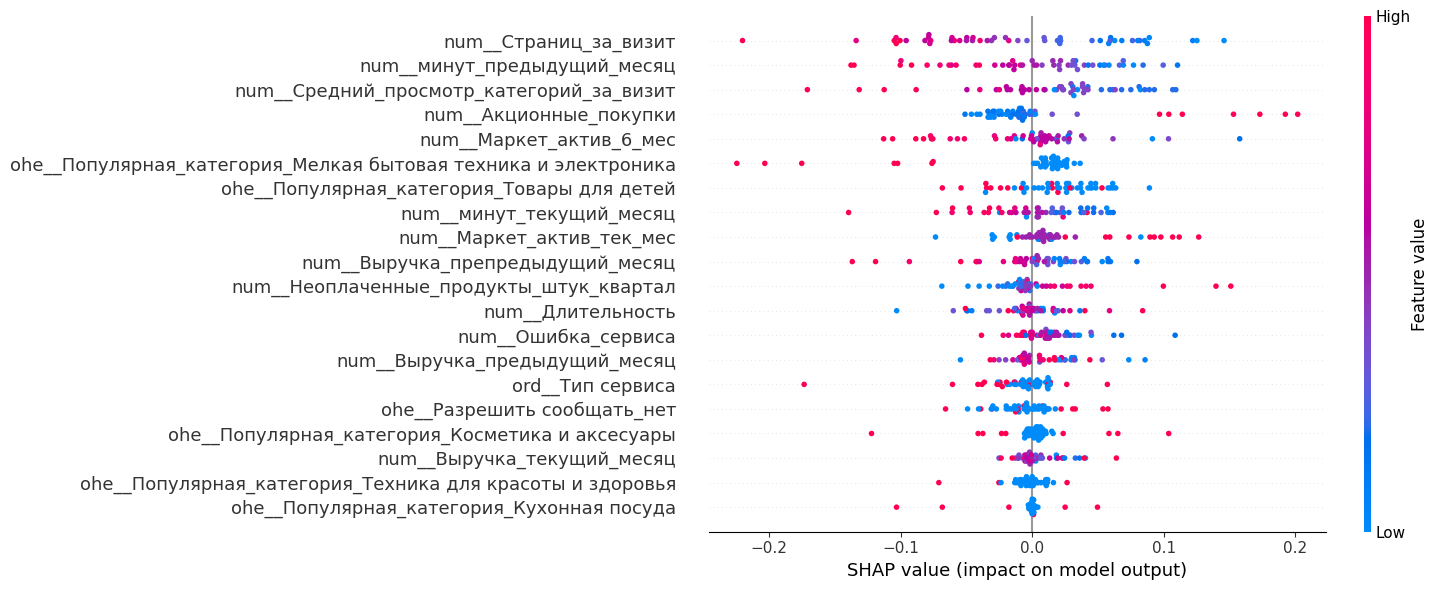

In [46]:
samples = 50
 
# Извлечение лучшей модели из результатов RandomizedSearchCV
best_model = grid_search.best_estimator_.named_steps['models']

# Предобработка данных через пайплайн без конечной модели
preprocessor = grid_search.best_estimator_.named_steps['preprocessor']
X_train_preprocessed = preprocessor.transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

all_feature_names = preprocessor.get_feature_names_out()

# Создаем DataFrame с соответствующими именами колонок
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=all_feature_names)
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=all_feature_names)

# Семпл данных для KernelExplainer
X_train_preprocessed_smpl = shap.sample(X_train_preprocessed_df, samples, random_state=RANDOM_STATE)
X_test_preprocessed_smpl = shap.sample(X_test_preprocessed_df, samples, random_state=RANDOM_STATE)

# Теперь, когда у нас есть DataFrame с именами признаков, мы можем использовать KernelExplainer
###explainer = shap.KernelExplainer(best_model.predict_proba, X_train_preprocessed_smpl)
explainer = shap.KernelExplainer(best_model.predict_proba, X_train_preprocessed_smpl)
shap_values = explainer.shap_values(X_test_preprocessed_smpl)

# Создаем объект Explanation для первого КЛАССА.
shap_values_explanation = shap.Explanation(
    values=shap_values[:,:,1], 
    base_values=explainer.expected_value,
    data=X_test_preprocessed_smpl,
    feature_names=all_feature_names
)

shap.summary_plot(shap_values_explanation, plot_size=[15,6])
plt.show()

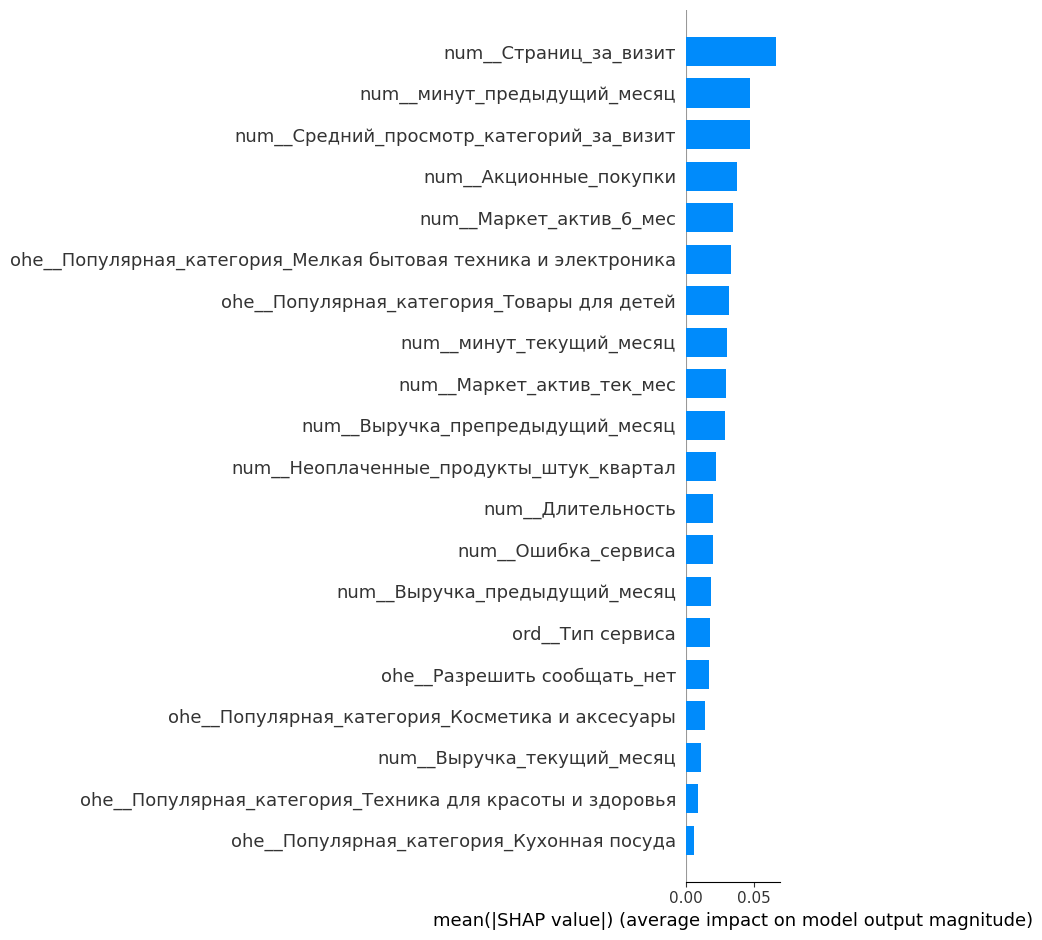

In [47]:
# Код ревьюера
shap.summary_plot(shap_values_explanation, plot_type='bar')
plt.show()

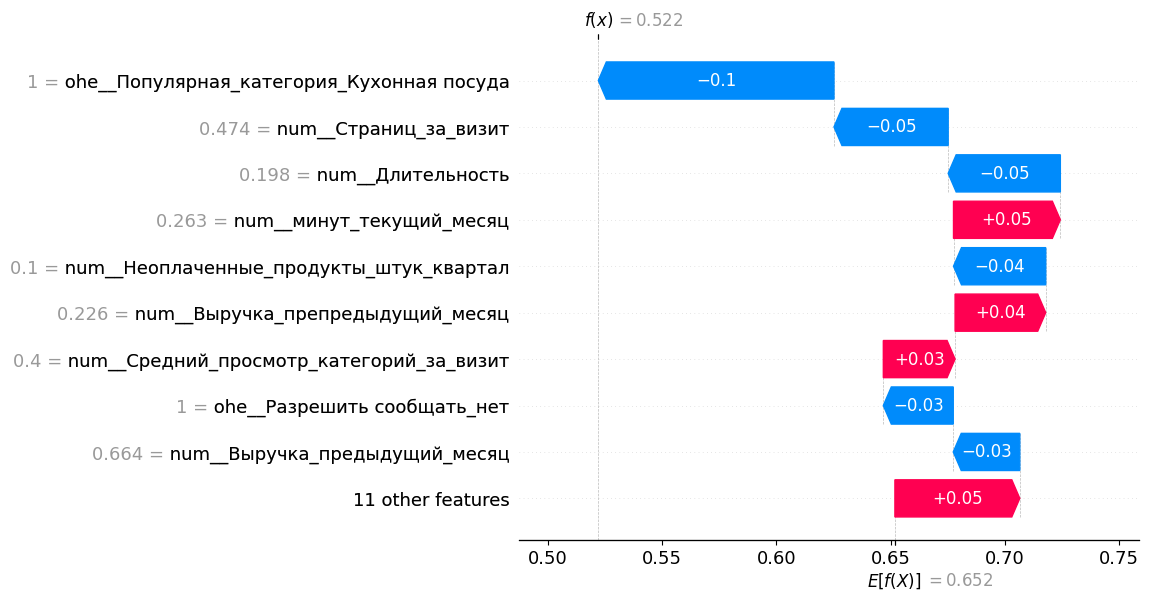

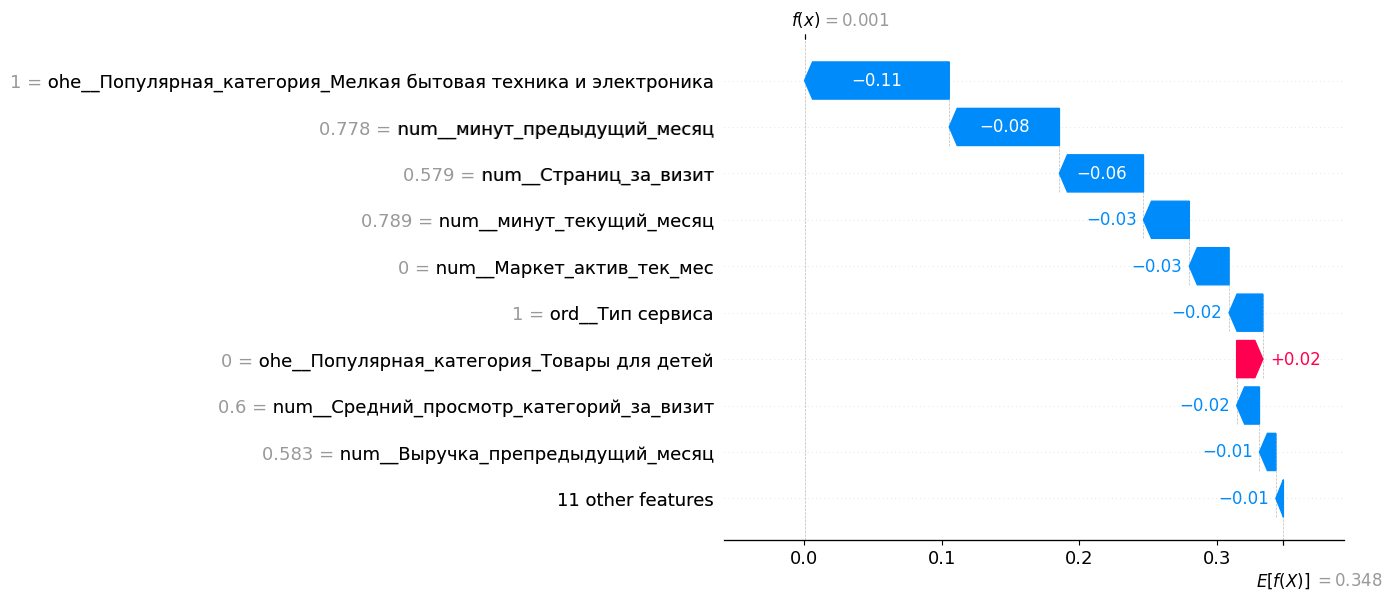

In [48]:
shap.plots.waterfall(shap_values_explanation[0]);
shap.plots.waterfall(shap_values_explanation[1]);
#shap.plots.waterfall(shap_values_explanation[2]);
plt.show()

<div class="alert alert-secondary" style="background-color:#DCDCDC;color:black;">
7.2 Сделайте выводы о значимости признаков:
-	какие признаки мало значимы для модели;
-	какие признаки сильнее всего влияют на целевой признак;
-	как можно использовать эти наблюдения при моделировании и принятии бизнес-решений.


Наш целевой признак 1 (Покупательская активность снизилась). 

В beeswarm-диаграмме, значит, нас интересует правая часть, сильнее всего на целевой ("активность снизится") признак влияют:
- (красные) высокие значения "Акционные покупки"
    - это, конечно, немного странно - не понятно, почему много распродаж влияет на то, что активность снизится (потому что человек купит всего больше и обеспечит себя на будущее?)
- (синие) малые значения количествао страниц за визит
    - тут логика понятна - активность снижается
- большое (красное) количество маркетинговых коммуникаций в текущем месяце
    - тоже логика понятна - человека заспамили - удалил приложение или закладку
- мало минут в предыдущем месяце
    - тут логика понятна - активность снижается
- малое количество категорий, которые покупатель просмотрел за визит в течение последнего месяца

В наименьшей степени влияют (то есть шап-значения сгруппировались ближе к 0):
- популярная категория
    - объяснить это можно тем, что потеря клиента обусловлена не ассортиментом, а другими конкурентными факторами

## Шаг 8. Сегментация покупателей

<div class="alert alert-secondary" style="background-color:#DCDCDC;color:black;">
8.1 Выполните сегментацию покупателей. Используйте результаты моделирования и данные о прибыльности покупателей.

In [49]:
# Проверим наш датасет:
df

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц
0,215349,1,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
1,215350,1,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
2,215351,1,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
3,215352,1,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
4,215353,1,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,216643,0,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7,14,7
1292,216644,0,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0,12,11
1293,216645,0,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2,12,18
1294,216646,0,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4923.0,4725.0,5224.6,18,7


Рассчитаем предсказание модели по исходному датафрейму:

In [50]:
model = grid_search.best_estimator_

prediction = model.predict_proba(df.drop(['Покупательская активность', 'id'], axis=1))

prediction = pd.DataFrame(prediction, columns=['0', 'вероятность_снижения_активности'])
prediction = prediction.drop(['0'], axis=1)
display(prediction)

,вероятность_снижения_активности
0,0.772385
1,0.607418
2,0.999999
3,0.740393
4,0.598149
...,...
1291,0.221060
1292,0.300152
1293,0.300153
1294,0.245280


Добавим предсказания к датафрейму:

In [51]:
df = pd.concat([df, prediction], axis=1, ignore_index=False)
display(df)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,вероятность_снижения_активности
0,215349,1,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,0.772385
1,215350,1,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13,0.607418
2,215351,1,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,0.999999
3,215352,1,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,0.740393
4,215353,1,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10,0.598149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,216643,0,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7,14,7,0.221060
1292,216644,0,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0,12,11,0.300152
1293,216645,0,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2,12,18,0.300153
1294,216646,0,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4923.0,4725.0,5224.6,18,7,0.245280


Добавим данные о прибыльности:

In [52]:
df = df.merge(dfs['money'], on='id', how='left')
display(df)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,вероятность_снижения_активности,Прибыль
0,215349,1,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,0.772385,4.16
1,215350,1,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13,0.607418,3.13
2,215351,1,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,0.999999,4.87
3,215352,1,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,0.740393,4.21
4,215353,1,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10,0.598149,3.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,216643,0,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7,14,7,0.221060,4.44
1292,216644,0,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0,12,11,0.300152,6.11
1293,216645,0,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2,12,18,0.300153,3.29
1294,216646,0,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4923.0,4725.0,5224.6,18,7,0.245280,4.03


Сегментируем пользователей по группам, обозначенным в условии задачи:
-	Группа клиентов с максимальной долей **покупок по акции** и высокой вероятностью снижения покупательской активности.
-	Группа клиентов, которые покупают **только технику**, то есть товары с длинным жизненным циклом.
-	Группа клиентов, которые покупают товары из категории «**Товары для себя**» (новая категория, которую можно выделить на основе текущих) или «Товары для детей».
-	Группа клиентов **с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью**.

Определим границы критериев

In [53]:
high_sales = df['Акционные_покупки'].quantile(0.75)
low_activity_risk = df['вероятность_снижения_активности'].quantile(0.75)
high_profit = df['Прибыль'].quantile(0.75)

Сформируем группы

In [54]:
df_high_sales_low_activity_risk = df.query( \
    f'Акционные_покупки > {high_sales} and'
    f' вероятность_снижения_активности > {low_activity_risk}')
display (df_high_sales_low_activity_risk)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,вероятность_снижения_активности,Прибыль
0,215349,1,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,0.772385,4.16
2,215351,1,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,0.999999,4.87
3,215352,1,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,0.740393,4.21
13,215364,1,премиум,да,4.3,4,708,0.98,Домашний текстиль,3,3,3,3,5795.5,4942.0,5484.8,11,9,0.869095,2.67
16,215367,1,премиум,да,4.2,4,581,0.40,Товары для детей,5,1,4,1,5164.5,4668.0,5493.4,8,7,0.607404,3.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,216191,0,стандарт,да,5.1,4,177,0.44,Косметика и аксесуары,3,2,2,7,5666.0,4970.0,6399.2,16,11,0.626693,5.39
1004,216356,0,стандарт,да,5.5,4,1022,0.91,Мелкая бытовая техника и электроника,3,0,3,11,5542.5,5082.0,6071.6,13,6,0.916472,3.26
1094,216446,0,стандарт,да,5.3,5,433,0.91,Техника для красоты и здоровья,1,1,0,7,4712.0,5160.0,5230.7,15,20,0.739848,4.47
1126,216478,0,стандарт,да,2.6,3,461,0.91,Косметика и аксесуары,3,1,3,9,5949.5,5612.0,6372.0,15,13,0.854619,3.62


In [55]:
df_only_tech = df.query('Популярная_категория in'
                        ' ["Техника для красоты и здоровья",'
                        ' "Мелкая бытовая техника и электроника"]')
display(df_only_tech)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,вероятность_снижения_активности,Прибыль
10,215361,1,стандарт,да,5.1,4,199,0.23,Техника для красоты и здоровья,4,5,2,3,6400.0,4597.0,3789.7,11,13,0.608856,4.03
14,215365,1,стандарт,да,3.9,4,167,0.95,Техника для красоты и здоровья,6,4,2,5,4577.0,4190.0,4799.3,6,10,0.532673,3.65
17,215368,1,премиум,да,3.8,5,829,0.24,Техника для красоты и здоровья,2,2,6,1,5823.0,4536.0,5591.6,11,9,0.872675,6.27
27,215378,1,стандарт,да,1.7,3,488,0.39,Техника для красоты и здоровья,5,1,4,3,3543.0,4302.0,4364.6,12,8,0.524712,3.03
30,215382,1,стандарт,да,4.6,4,330,0.89,Техника для красоты и здоровья,6,2,7,6,5545.5,4824.0,6403.5,15,8,0.607358,2.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,216641,0,стандарт,да,4.1,4,638,0.22,Техника для красоты и здоровья,4,1,6,14,5654.5,5176.0,6199.2,14,12,0.204518,4.50
1290,216642,0,премиум,да,4.2,3,991,0.40,Мелкая бытовая техника и электроника,4,3,5,12,4589.5,5011.0,4354.2,19,19,0.000559,5.63
1291,216643,0,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7,14,7,0.221060,4.44
1294,216646,0,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4923.0,4725.0,5224.6,18,7,0.245280,4.03


In [56]:
df_only_forself = df.query('Популярная_категория in ['
                           ' "Косметика и аксесуары",'
                           ' "Техника для красоты и здоровья",'
                           ' "Товары для детей",'
                           ']')
display(df_only_forself)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,вероятность_снижения_активности,Прибыль
0,215349,1,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10,0.772385,4.16
2,215351,1,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,0.999999,4.87
3,215352,1,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11,0.740393,4.21
5,215354,1,стандарт,да,5.1,3,431,0.23,Косметика и аксесуары,2,3,7,2,5685.0,4503.0,5869.6,11,12,0.514784,3.62
6,215355,1,стандарт,нет,4.7,4,284,0.17,Товары для детей,5,1,6,4,3263.0,4749.0,3772.6,12,10,0.426646,5.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,216639,0,стандарт,да,4.8,4,306,0.29,Товары для детей,4,5,3,7,4648.0,4591.0,4827.4,14,22,0.131825,3.26
1289,216641,0,стандарт,да,4.1,4,638,0.22,Техника для красоты и здоровья,4,1,6,14,5654.5,5176.0,6199.2,14,12,0.204518,4.50
1291,216643,0,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7,14,7,0.221060,4.44
1294,216646,0,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4923.0,4725.0,5224.6,18,7,0.245280,4.03


In [57]:
df_high_profit_low_activity_risk = df.query( \
    f'Прибыль > {high_profit} and'
    f' вероятность_снижения_активности > {low_activity_risk}')
display(df_high_profit_low_activity_risk)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,Выручка_предыдущий_месяц,Выручка_препредыдущий_месяц,Выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,вероятность_снижения_активности,Прибыль
2,215351,1,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13,0.999999,4.87
17,215368,1,премиум,да,3.8,5,829,0.24,Техника для красоты и здоровья,2,2,6,1,5823.0,4536.0,5591.6,11,9,0.872675,6.27
33,215385,1,стандарт,да,3.6,4,721,0.24,Домашний текстиль,5,3,4,4,6184.5,4707.0,6627.8,10,8,0.677561,4.85
36,215388,1,стандарт,да,3.5,4,663,0.99,Домашний текстиль,4,2,2,2,3188.0,4182.0,3232.2,10,12,0.607392,5.16
39,215391,1,премиум,да,3.5,3,754,0.30,Косметика и аксесуары,3,1,2,1,5928.5,4556.0,5824.5,10,11,0.765565,5.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,215927,1,стандарт,да,5.2,4,801,0.99,Кухонная посуда,2,1,4,9,5108.0,4798.0,4968.9,17,9,0.607391,5.35
683,216035,0,премиум,нет,3.8,4,570,0.14,Товары для детей,2,1,2,13,3615.0,4763.0,4739.5,16,13,0.756045,5.68
839,216191,0,стандарт,да,5.1,4,177,0.44,Косметика и аксесуары,3,2,2,7,5666.0,4970.0,6399.2,16,11,0.626693,5.39
1208,216560,0,стандарт,нет,4.4,4,891,0.94,Мелкая бытовая техника и электроника,2,2,6,14,5724.5,5042.0,6446.0,17,14,0.720316,5.13


<div class="alert alert-secondary" style="background-color:#DCDCDC;color:black;">

8.2-1 Выберите группу покупателей и предложите, как увеличить её покупательскую активность: 
- Проведите графическое и аналитическое исследование группы покупателей.

Выбираю для анализа сегмент "Группа клиентов **с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью**".

Изучим категориальные значения

In [58]:
df_eda = df_high_profit_low_activity_risk

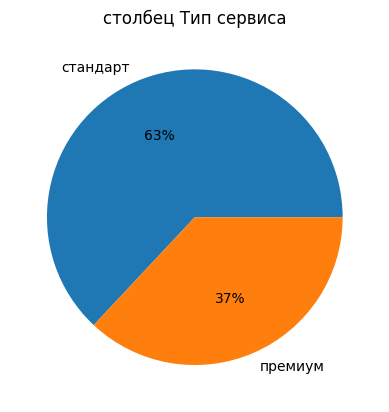

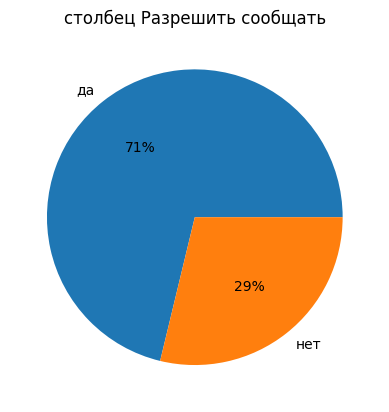

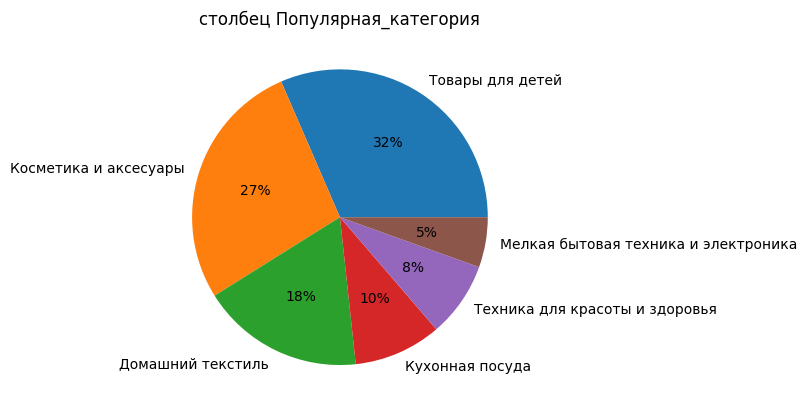

In [59]:
for column in df_eda:
    if df_eda[column].dtype == 'O':
        draw_categorial_stats(df_eda[column],
                                f"столбец {column}")
        plt.show()

Проверим количественные значения

'********** Следующий признак: столбец Покупательская активность'

count    73.000000
mean      0.945205
std       0.229154
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Покупательская активность, dtype: float64

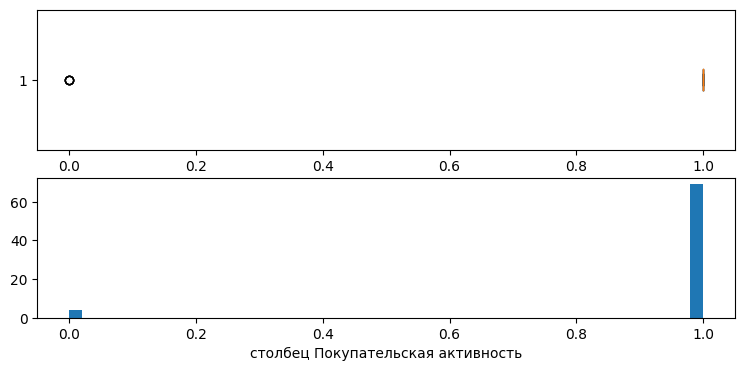

'********** Следующий признак: столбец Маркет_актив_6_мес'

count    73.000000
mean      3.587671
std       0.925855
min       1.500000
25%       3.100000
50%       3.800000
75%       4.100000
max       5.600000
Name: Маркет_актив_6_мес, dtype: float64

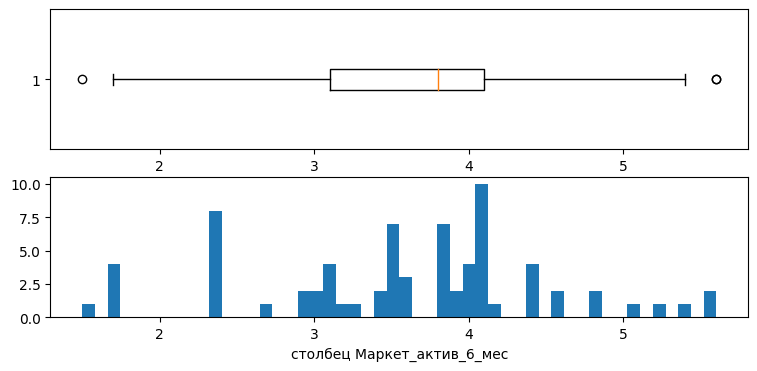

'********** Следующий признак: столбец Маркет_актив_тек_мес'

count    73.000000
mean      4.123288
std       0.706030
min       3.000000
25%       4.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: Маркет_актив_тек_мес, dtype: float64

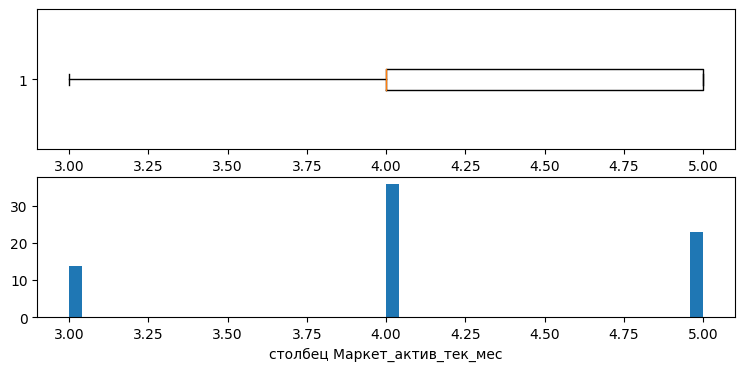

'********** Следующий признак: столбец Длительность'

count      73.000000
mean      648.164384
std       217.532502
min       163.000000
25%       474.000000
50%       694.000000
75%       816.000000
max      1073.000000
Name: Длительность, dtype: float64

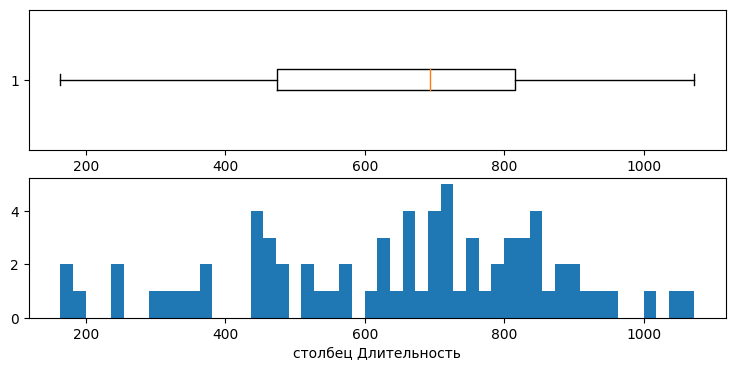

'********** Следующий признак: столбец Акционные_покупки'

count    73.000000
mean      0.446712
std       0.293963
min       0.120000
25%       0.240000
50%       0.320000
75%       0.440000
max       0.990000
Name: Акционные_покупки, dtype: float64

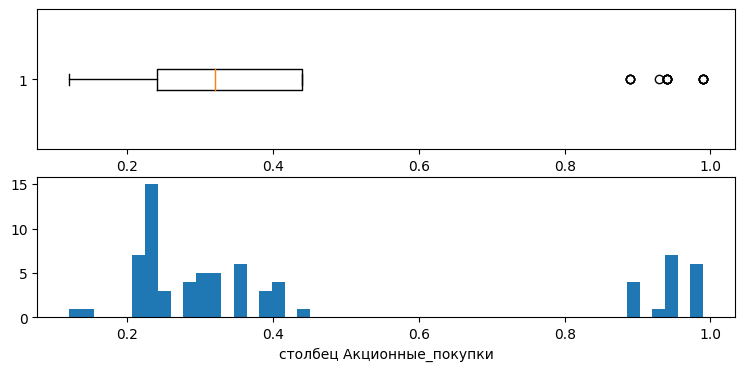

'********** Следующий признак: столбец Средний_просмотр_категорий_за_визит'

count    73.000000
mean      2.287671
std       1.086271
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       6.000000
Name: Средний_просмотр_категорий_за_визит, dtype: float64

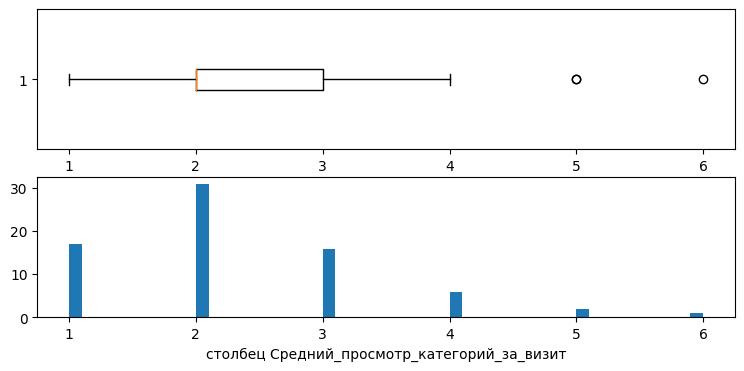

'********** Следующий признак: столбец Неоплаченные_продукты_штук_квартал'

count    73.000000
mean      4.082192
std       2.325901
min       0.000000
25%       2.000000
50%       4.000000
75%       6.000000
max      10.000000
Name: Неоплаченные_продукты_штук_квартал, dtype: float64

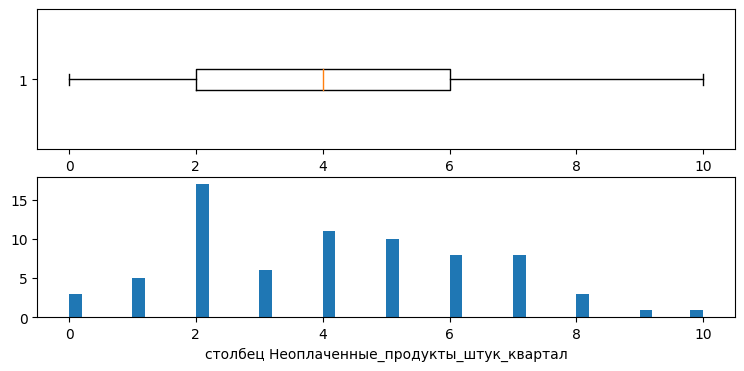

'********** Следующий признак: столбец Ошибка_сервиса'

count    73.000000
mean      3.917808
std       1.730072
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       8.000000
Name: Ошибка_сервиса, dtype: float64

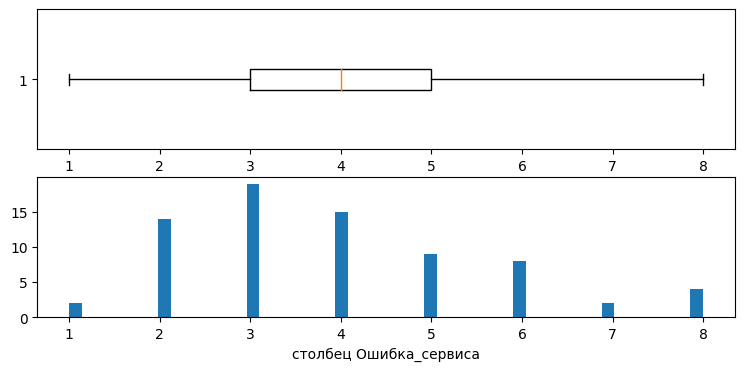

'********** Следующий признак: столбец Страниц_за_визит'

count    73.000000
mean      4.739726
std       2.733676
min       1.000000
25%       3.000000
50%       4.000000
75%       6.000000
max      14.000000
Name: Страниц_за_визит, dtype: float64

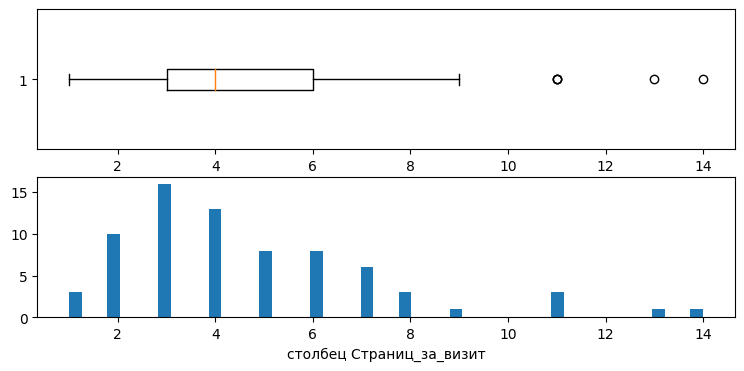

'********** Следующий признак: столбец Выручка_предыдущий_месяц'

count      73.000000
mean     4945.561644
std       874.849288
min      2909.000000
25%      4397.000000
50%      5046.000000
75%      5681.000000
max      6227.000000
Name: Выручка_предыдущий_месяц, dtype: float64

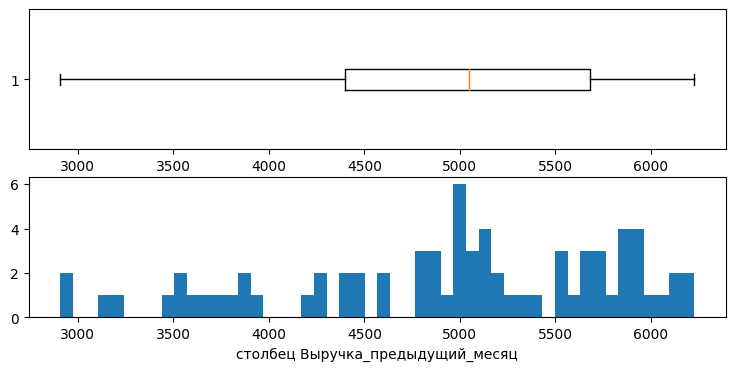

'********** Следующий признак: столбец Выручка_препредыдущий_месяц'

count      73.000000
mean     4586.315068
std       255.874040
min      4119.000000
25%      4382.000000
50%      4559.000000
75%      4769.000000
max      5236.000000
Name: Выручка_препредыдущий_месяц, dtype: float64

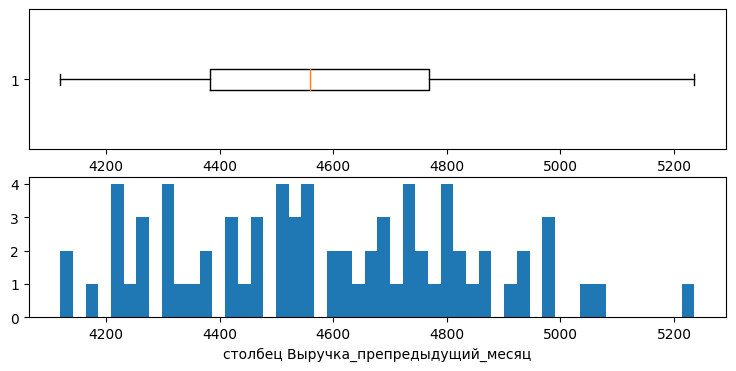

'********** Следующий признак: столбец Выручка_текущий_месяц'

count      73.000000
mean     5319.641096
std       893.061889
min      3078.300000
25%      4621.300000
50%      5485.400000
75%      6068.300000
max      7063.000000
Name: Выручка_текущий_месяц, dtype: float64

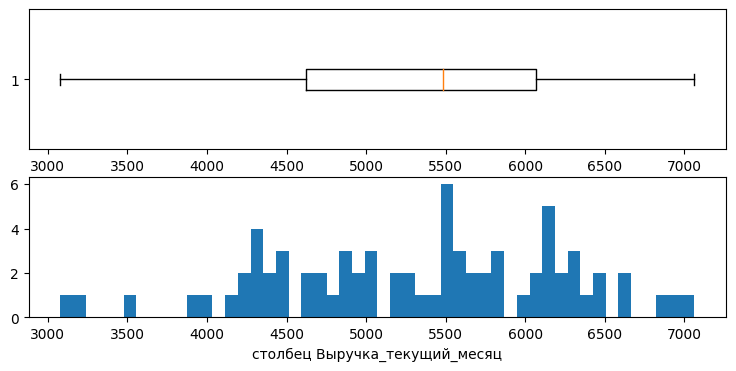

'********** Следующий признак: столбец минут_предыдущий_месяц'

count    73.000000
mean     10.287671
std       2.964978
min       5.000000
25%       9.000000
50%      10.000000
75%      11.000000
max      18.000000
Name: минут_предыдущий_месяц, dtype: float64

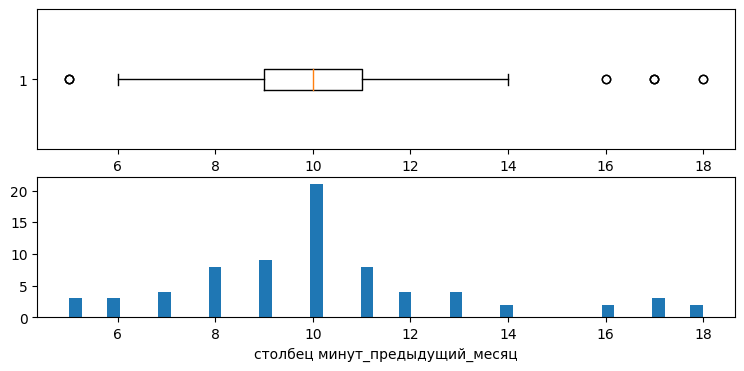

'********** Следующий признак: столбец минут_текущий_месяц'

count    73.000000
mean     10.342466
std       2.625829
min       6.000000
25%       9.000000
50%      10.000000
75%      12.000000
max      22.000000
Name: минут_текущий_месяц, dtype: float64

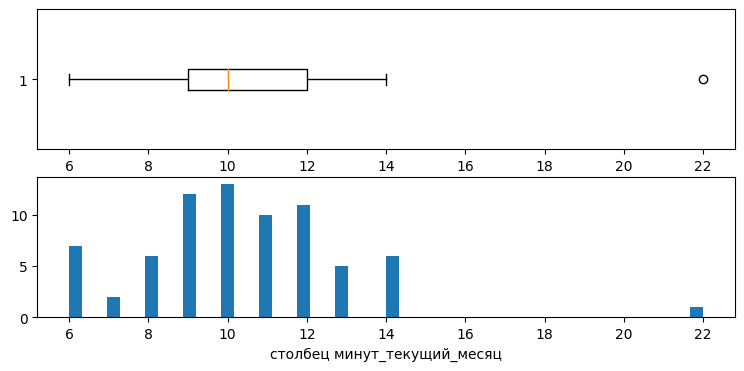

'********** Следующий признак: столбец вероятность_снижения_активности'

count    73.000000
mean      0.720444
std       0.111698
min       0.607391
25%       0.623662
50%       0.682617
75%       0.802246
max       0.999999
Name: вероятность_снижения_активности, dtype: float64

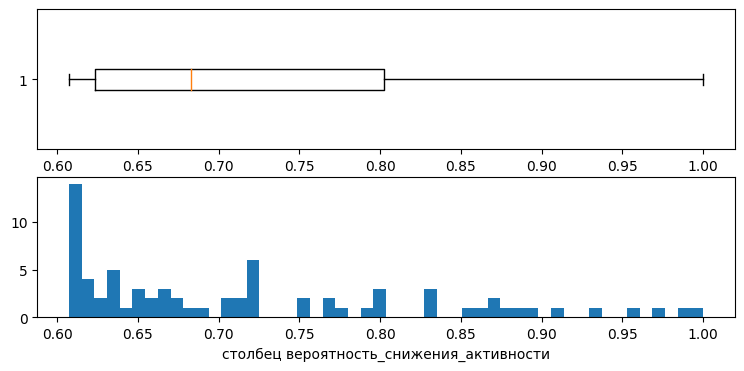

'********** Следующий признак: столбец Прибыль'

count    73.000000
mean      5.280959
std       0.476795
min       4.690000
25%       4.950000
50%       5.130000
75%       5.490000
max       6.880000
Name: Прибыль, dtype: float64

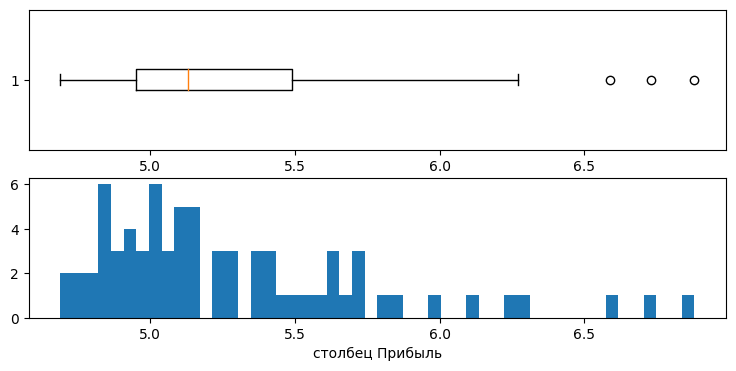

In [60]:
for column in df_eda:
    if df_eda[column].dtype in ['int64', 'float64'] and column != "id":
        draw_numerical_stats(df_eda[column],
                                f"столбец {column}", "" )

Нас интересует, с чем коррелиркует рост вероятности того, что активность снизится:

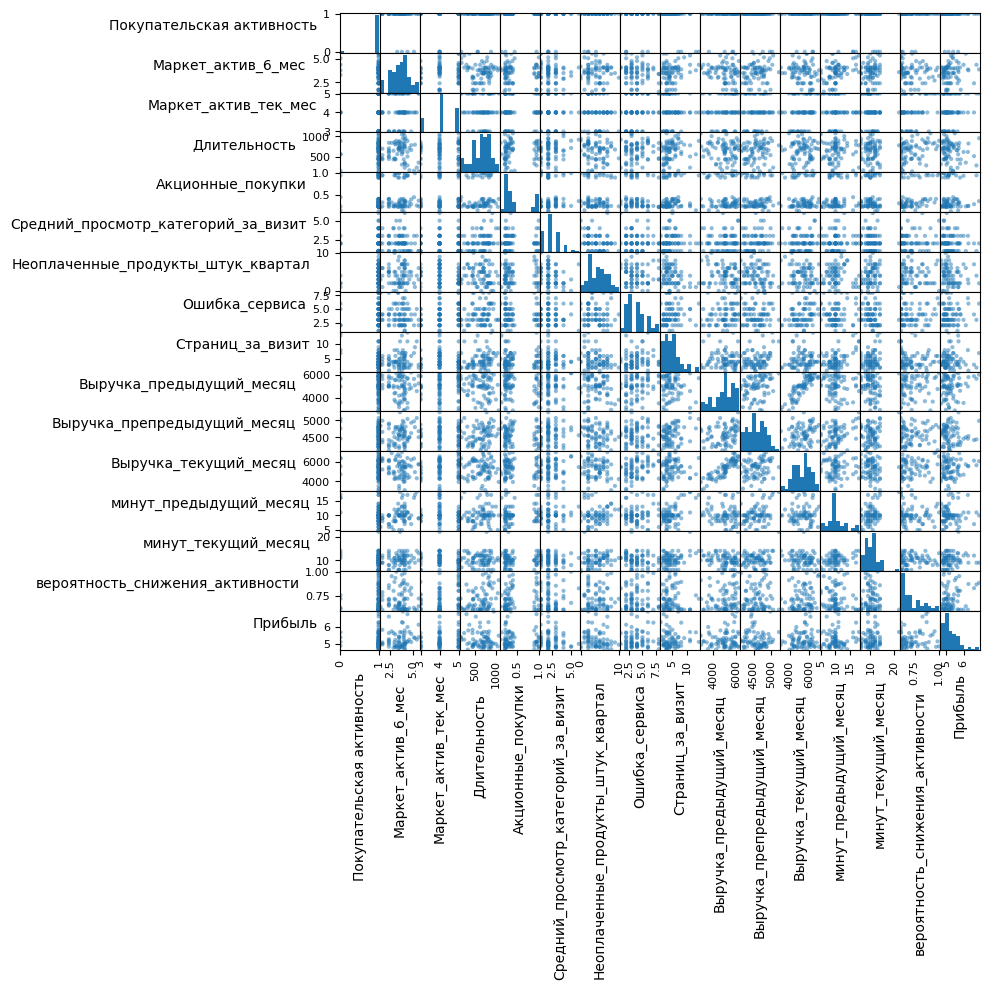

In [61]:
df_num = df_high_profit_low_activity_risk.select_dtypes(include='number')
df_num = df_num.drop(['id'], axis=1)

axes = pd.plotting.scatter_matrix(df_num, figsize=(10, 10))
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

interval columns not set, guessing: ['Покупательская активность', 'Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'Выручка_предыдущий_месяц', 'Выручка_препредыдущий_месяц', 'Выручка_текущий_месяц', 'минут_предыдущий_месяц', 'минут_текущий_месяц', 'вероятность_снижения_активности', 'Прибыль']


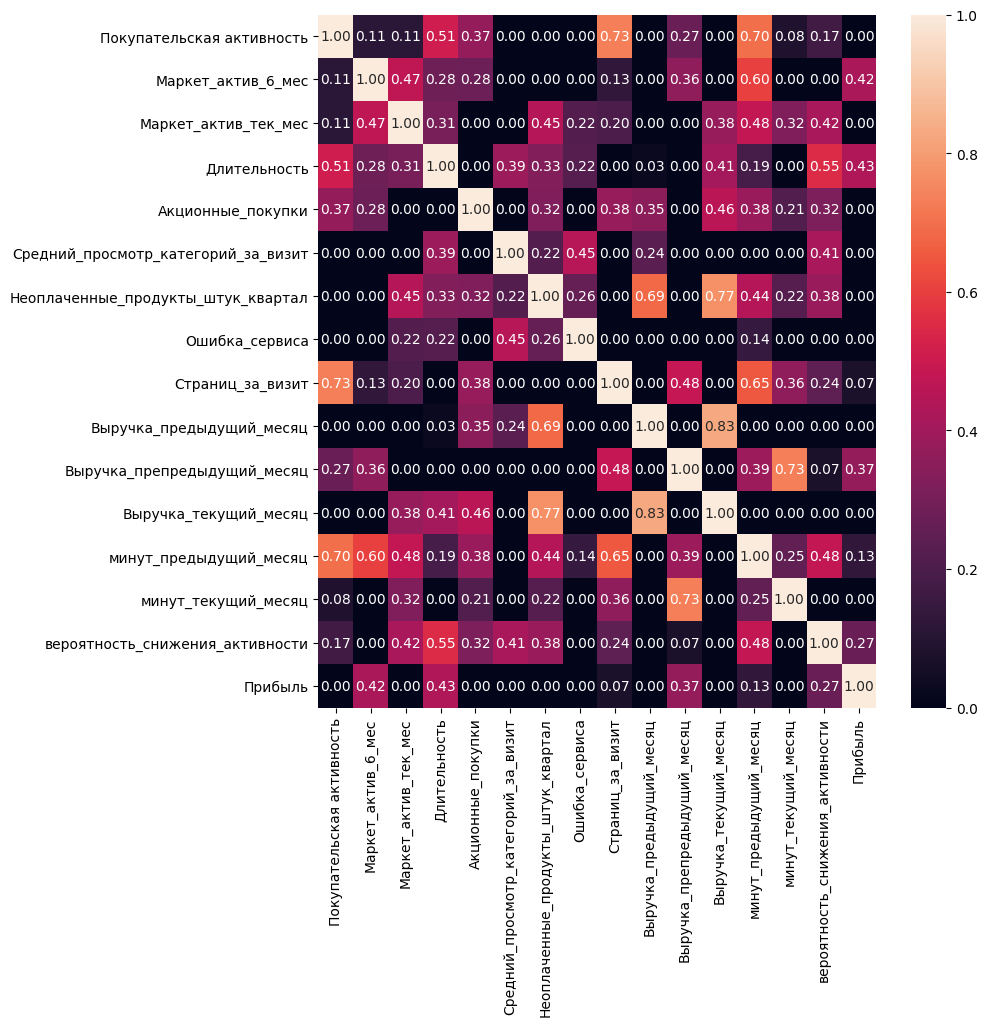

In [62]:
fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(df_num.phik_matrix(), annot=True, fmt='.2f');


- Анализ фичей по отдельности для сегмента "Группа клиентов **с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью**":
    - 63% пользователей сегмента - стандартные, не премиум
        - 63% - это не 90%, поэтому заботиться тут нужно и о сдандартных, и о премиум клиентах, примерно одинаково - значит эта характеристива не столь важна
    - 71% из них разрешает сообщать об акциях
        - это хорошо, продолжим использовать эту возможность, и хорошо, что она в принципе есть
    - Более всего они покупают Товары для детей  (32%) и Косметика и акксессуары (27%), а также домашний текстиль (18%).
        - скорее это женщины
    - среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев ~3.6
    - количество маркетинговых коммуникаций в текущем месяце ~4.1
    - среднее количество дней, прошедших с момента регистрации покупателя на сайте ~648
        - в основном это давние пользователи сервиса
    - среднее количество акционных покупок - 45%
        - видимо, что данная группа предпочитает при возможности экономить
    - за визит в среднем смотрят 2.3 категории
        - видимо, что ищут нужное, а не сёрфят и не делают покупки от скуки
    - среднее  число неоплаченных товаров в корзине за последние 3 месяца ~4
        - наличие неоплаченных покупок немного противоречит предыдущему предположению, хотя в корзину могут набирать на будущее, а не оплачивать по причине отсутствия возможности
    - среднее число сбоев, которые коснулись покупателя во время посещения сайта ~4
        - сбои есть, это нехорошо, но их влияние нужно оценивать с на большем промежутке времени и с большей гранулярностью, что просто "за последние 3 месяца" - в данном случае, кажется, мало данных для выводов
    - среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца ~4.7
- Анализ корреляции вероятности снижения активности по scatter_matrix и phik (предпоследняя строка матриц):
    - Явной корреляции с вероятностью снижения не видно. 
- Анализ корреляции других фичей между собой по phik (предпоследняя строка матриц):
    - более высокая выручка коррелирует с неоплаченных продуктами (0.77)
        - это непросто объяснить и использовать
    - рост количества посещённых страниц  (0.73), а также рост минут (0.70) - коррелируют со снижением активности 
        - это возможно при плохом ассортименте магазина, либо наоборот о проблеме выбора, когда ассортимент слишком велик
- Из Shap, также помним, что (с точностью до все пользователей) на снижение активности влияют:
    - слишком много акций
    - слишком много коммуникаций.

<div class="alert alert-secondary" style="background-color:#DCDCDC;color:black;">

8.2-2 Выберите группу покупателей и предложите, как увеличить её покупательскую активность: 
- Сделайте предложения по работе с сегментом для увеличения покупательской активности.


На основе выводов выше:
- акции нужно предлагать не премиум-сегмента, с упором на экономию (купи 2, получи 3)
- больше акций нужно для женщин
- нужно более точное таргетирование, чтобы предлагать то, что нужно
- нужно сбалансировать ассортимент магазина (упростить его если перегружен, либо обогатить, если беден)
- можно предлагать покупку в рассрочку
- нельзя перебарщивать с количеством коммуникаций
- слишком много акций давать тоже не стоит

<div class="alert alert-secondary" style="background-color:#DCDCDC;color:black;">

8.3 Сделайте выводы о сегментах:
-	какой сегмент вы взяли для дополнительного исследования,
-	какие предложения вы сделали и почему.


## Шаг 9. Общий вывод

<div class="alert alert-secondary" style="background-color:#DCDCDC;color:black;">

опишите задачу;


Требуется:
- разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность
- построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца
- выделить сегменты покупателей и разработать для них персонализированные предложения

(более подробное описание уже есть в начале проекта)

<div class="alert alert-secondary" style="background-color:#DCDCDC;color:black;">
-	опишите исходные данные и проведённую предобработку;


- в таблице money.csv использованы неоптимальные сепараторы, пришлось их исправить
- исправлены неявные дубликаты в market_file
- исправлена опечатка в имени поля в таблице market_time
- удалены выбросы выручки в таблице market_money

<div class="alert alert-secondary" style="background-color:#DCDCDC;color:black;">
-	напишите, что вы сделали для поиска лучшей модели;


Был построен пайплайн, в котором были испробованы DecisionTreeClassifier, KNeighborsClassifier, LogisticRegression, SVC, а также различные их гиперапраметры. Также были попробованы StandardScaler и MinMaxScaler для масштабирования, и использовались OneHotEncoder, OrdinalEncoder для кодирования текстовых признаков.

<div class="alert alert-secondary" style="background-color:#DCDCDC;color:black;">
-	укажите лучшую модель;


Лучшие показатели удалось достичь на SVC (на тестовой выборке):
- precision = 0.74
- precision = 0.84

<div class="alert alert-secondary" style="background-color:#DCDCDC;color:black;">
-	добавьте выводы и дополнительные предложения для выбранного сегмента покупателей.


- В процессе EDA выявилось, что отношение прибыли к выручке слишком мало - лишь 0.03%.
- Для сегмента покупателей "Группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью" выработаны предложения по уменьшению оттока клиентов:
    - акции нужно предлагать не премиум-сегмента, с упором на экономию (купи 2, получи 3)
    - больше акций нужно для женщин
    - нужно более точное таргетирование, чтобы предлагать то, что нужно
    - нужно сбалансировать ассортимент магазина (упростить его если перегружен, либо обогатить, если беден)
    - можно предлагать покупку в рассрочку
    - нельзя перебарщивать с количеством коммуникаций
    - слишком много акций давать тоже не стоит